# Agenda
1. [What is validation and why do we need it?](#Intro)
2. [Evaluation Metrics:](#metrics) <br>
    2.1 [Optimization Loss and Evaluation Metrics](#loss_and_metric) <br>
    2.2 [Classification metrics](#classification_metrics) <br>
    2.3 [Regression metrics](#regression_metrics) <br>
    2.4 [Embedding metrics](#embedding_metrics) <br>
    2.5 [Generative NLP metrics](#generative_metrics) <br>
    2.6 [RAG metrics](#rag_metrics) <br>
    2.7 [Pairwise arena evaluation](#arena_metrics) <br>
3. [Validation Strategies:](#validation_strategies) <br>
    3.1 [Overfitting. Why do we need train/test concept?](#overfitting) <br>
    3.2 [Holdout / Stratified split / train-validation-test](#holdout) <br>
    3.3 [K-fold / Stratified K-fold / Repeated K-fold](#kfold) <br>
    3.4 [Time-based validation / Time K-fold](#timebased) <br>
    3.5 [Group K-fold](#groupkfold) <br>
    3.6 [Choosing the right strategy for real-life scenarios and competition LB consistency](#strategychoose) <br>
4. [Local validation VS real-life/competition testing metrics mismatch](#validation_mismatch) <br>
    4.1 [Wrong local validation strategy](#wrong_local_validation) <br>
    4.2 [Shifted features distributions](#shifted_features) <br>
    4.3 [Adversarial validation](#adversarial_validation) <br>
5. [Practice](#Practice)

<a id='Intro'></a>
# What is validation and why do we need it?

The ML models validation process is a crucial step in developing machine learning models. It involves assessing the performance and generalization capabilities of a trained model to ensure that it can make accurate predictions on new, unseen data. There are such key points in evaluating models:

**Generalization performance** - We want to estimate the predictive performance of our model on future (unseen) data.
- Ideally, the estimated performance (based on evaluation metrics) of a model tells us how well it performs on unseen data, because making predictions on future (unseen) data is often the main problem we want to solve.

**Hyperparameters tuning and feature engineering** - We want to increase the predictive performance by tweaking the learning algorithm and selecting the best performing model from a given hypothesis space.
- Typically, machine learning involves a lot of experimentation. Running a learning algorithm over a training dataset with different hyperparameter settings and different features will result in different models. Since we are typically interested in selecting the best-performing model from this set, we need to find a way to estimate their respective performances in order to rank them against each other.

**Model selection** - We want to compare different ML models (e.g. linear, decision tree, gradient boosting, etc.), selecting the best-performing one.
- We are usually not only experimenting with the one single algorithm that we think would be the “best solution” under the given circumstances. More often than not, we want to compare different models to each other, oftentimes in terms of predictive and computational performance.

<a id='metrics'></a>
# 2. Evaluation metrics
An evaluation metric, in the context of machine learning and data analysis, is a quantitative measure used to assess the performance or quality of a model or a system's output with respect to a specific task or objective. Evaluation metrics are crucial because they provide a standardized way to measure and compare the performance of different models or systems. The choice of evaluation metric depends on the nature of the task being addressed (e.g. classification, regression, ranking) and the specific goals and requirements of the project.

<a id='loss_and_metric'></a>
## 2.1 Optimization Loss and Evaluation Metrics
Optimization loss and evaluation metrics serve different roles in the context of machine learning model training and evaluation. Here are the key differences between the two: <br>
1. **Purpose**: <br>
    **Optimization Loss:** often simply referred to as "loss", is a mathematical function that the machine learning model aims to minimize during training. It serves as the objective function that guides the model's parameter updates during optimization. The primary purpose of the loss function is to measure the dissimilarity between the model's predictions and the true target values. It provides the model with a signal for adjusting its internal parameters to improve its predictive performance on the training data. The model's parameters are updated in the direction that reduces this loss, using techniques like gradient descent.<br>
    **Evaluation Metric:** used to assess the model's performance and quality after it has been trained and to evaluate how well it generalizes to new, unseen data. These metrics are not used during training but rather during the model evaluation phase to provide a quantitative measure of how well the model is achieving its intended task. Evaluation metrics are often chosen based on the specific problem and the practical goals of the application.
    
2. **Function properties:** <br>
    **Optimization Loss:** differentiable "almost everywhere" with respect to model parameters function that is well-suited for gradient-based optimization algorithms. Common examples include mean squared error (MSE), mean absolute error (MAE) for regression tasks and cross-entropy loss for classification tasks. <br>
    **Evaluation Metric:** both continuous and discrete, are usually much better interpretable than loss, depending on the nature of the task. Examples include accuracy, precision, recall, F1-score, roc-auc, mean absolute percentage error, etc.
    

### What are "good" and "bad" properties of different evaluation metrics?

- **differentiability "almost everywhere"** - is definitely a good property, because this kind of a metrics could serve as a training loss, so you can directly optimize it with SGD-based methods.
- **multiclass/multivariate extensibility** - is definitely a good property, because in many real-life tasks you'll need to handle multicalss/multivariate ML problems, so you can extend your regular metric to them.
- **reference values** - is definitely a good property, because if the metric has some reference values (e.g. ROCAUC=0.5), then without deep-diving into the problem itself and the nature of the data, we can immediately say whether the solution is rather good or not.
- **interpretability** - is rather good property. When we talk about interpretability in terms of ML evaluation metrics, we're often discussing how understandable the metrics themselves are (especially by people without a deep background in ML), as well as how well they allow us to interpret the performance and characteristics of the model. Although, understanding more complex and less interpretable metrics fully may require some background knowledge, but they may provide deeper insights into some specific aspects of model performance.
- **values limitation** - is rather good property, because if metric values are limited in some specific range is there is no risk of getting +-infinity values, with which it is not very clear what to do.
- **outliers resistance** - is rather a good property, but only for problems in which outliers are not so important, e.g. in algo-trading there could be "outlier"-like situations in the market which can lead to your algorithm losing most of its money at once -> so you'll need to take care of outliers and doesn't use outlier-resistant metrics.
- **equivalence of accounting for errors of the first and second types** - very much depends on the business task itself. E.g. in the classical credit scoring problem you would rather lend to fewer people, but who will definitely return your money, than to a much larger number of people who will not return your money (precision-based optimization), on the other hand in the task of primary disease diagnosis it is much more important to correctly identify all people with a disease, while falsely identifying healthy people as sick, than to very accurately identify those who are sick while missing half (recall-based optimization)

    
<a id='classification_metrics'></a>
## 2.2 Classification metrics

A binary machine learning classification task is a type of supervised learning problem in which the goal is to categorize data points into one of two distinct classes or categories. In other words, the output or prediction of the model is the probability distribution of an element belonging to the corresponding classes. These two classes are often referred to as the positive class and the negative class. The objective is to learn a model that can accurately classify new, unseen data points into one of these two classes based on the features or attributes of the data.

Let's take a look at some common metrics using NLP example [Disaster Tweets](https://www.kaggle.com/competitions/nlp-getting-started):
![](https://storage.googleapis.com/kaggle-media/competitions/tweet_screenshot.png)

The author explicitly uses the word “ABLAZE” (палаючий) but means it metaphorically. This is clear to a human right away, especially with the visual aid. But it’s less clear to a machine.

In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified.
Disclaimer: The dataset for this competition contains text that may be considered profane, vulgar, or offensive.

**Please check info about Kaggle API** [here](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwifhoe5_7mBAxXPGRAIHXuXAWIQFnoECBIQAw&url=https%3A%2F%2Fgithub.com%2FKaggle%2Fkaggle-api%23%3A~%3Atext%3DTo%2520use%2520the%2520Kaggle%2520API%2Cfile%2520containing%2520your%2520API%2520credentials.&usg=AOvVaw1BewOUEPrUy1mWsrqk8T5U&opi=89978449)

In [1]:
import platform

!kaggle competitions download -c nlp-getting-started

# Check if using Windows or Unix-based system
if platform.system() == "Windows":
    !powershell -command Expand-Archive nlp-getting-started.zip -DestinationPath nlp-getting-started -Force
else:
    !unzip nlp-getting-started.zip -d nlp-getting-started

nlp-getting-started.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

df_twitter = pd.read_csv('nlp-getting-started/train.csv')
df_twitter.sample(5)

,id,keyword,location,text,target
7144,10237,volcano,Massachusetts,Not only does he know the latest research the ...,1
4708,6694,landslide,"i got 1/13 menpa replies, omg",*nominates self but @_ohhsehuns wins by a land...,0
1805,2593,crash,"Lancaster, Pennsylvania, USA",Police respond to crash find 'suspected heroin...,1
2050,2942,danger,ALWAYS DYING NEVER RESTING,SO THIRSTY YALL IN DANGER OF DEHYDRATION,1
6259,8944,storm,NaN,#gamefeed Warcraft 3-Inspired Mode Likely Hitt...,0


In [5]:
# 1 - real disaster, 0 - metaphoric
df_twitter.target.value_counts(normalize=True)

target
0    0.57034
1    0.42966
Name: proportion, dtype: float64

In [6]:
#straightforward train/test split

X_train, X_test, y_train, y_test = train_test_split(
    df_twitter.text, df_twitter.target, test_size=0.3, random_state=42
)

In [7]:
#modeling and inference

pipe_classification = Pipeline([
    ('vectorizer', TfidfVectorizer(
        analyzer='word',
        stop_words='english',
        ngram_range=(1, 3),
        lowercase=True,
        min_df=5,
        max_features=30000
    )),  
    ('classifier', LogisticRegression(C=1.0, random_state=42))
])

pipe_classification.fit(X_train, y_train)

y_hat = pipe_classification.predict_proba(X_test)[:, 1]

$$Let \hspace{0.1cm} Y = \Bigl\{ y_{i} \Bigl\} \hspace{0.1cm} - \hspace{0.1cm} vector \hspace{0.1cm} of\hspace{0.1cm} ground\hspace{0.1cm} truth\hspace{0.1cm} labels \hspace{0.5cm}  y_{i} є \{0, 1\}$$
$$Let \hspace{0.1cm} \hat{Y} = \Bigl\{ \hat{y_{i}} \Bigl\} \hspace{0.1cm} - \hspace{0.1cm} vector \hspace{0.1cm} of\hspace{0.1cm} predicted\hspace{0.1cm} probabilities\hspace{0.1cm} of \hspace{0.1cm} class \hspace{0.1cm} 1 \hspace{0.5cm} \hat{y_{i}} є [0, 1]$$
### Continuous metrics:
**Log-Loss / Cross-Entropy Loss** <br>
$$ LogLoss = {-\frac{1}{N} \sum_{i=1}^{N}(y_{i}log(\hat{y_{i}})+(1-y_i)log(1-\hat{y_{i}}))}$$
##### Pros:
    + Differentiable
    + Could be a loss
    + Impact of misclassification confidence: Log loss takes into account the model's confidence in its predictions. If a model is highly confident in an incorrect prediction, it will result in a higher log loss than a less confident incorrect prediction
    + Multiclass extension: Log loss can be extended to multiclass classification problems, where there are more than two classes

##### Cons:
    - Poorly interpretable (especially for people without IT/ML background)
    - Not limited: Log loss values range from 0 to positive infinity
    - Doesn't have "reference values": without knowing the task and classes distribution it's hard to tell whether e.g. 0.1/0.5/1.5 refers to a rather "good" or "poor" model performance 

In [8]:
from sklearn.metrics import log_loss

log_loss(y_test, y_hat)

0.4820593268692158

### Discrete metrics:

In the discrete metric case we work with "hard" labels intead of "soft" labels or probabilities. Soft labels can transformed into hard labels for example using threshold for binary classification: e.g. if value > 0.5 then we consider it as a positive class and replace it with 1; otherwise we consider it as a negative class and replace it with 0.

In order to introduce all common discrete metrics we need to get familiar with the **confusion matrix** that consists of 4 components:
- **TP (True Positive)** - number of pairs for which $y_{i}=1$ and $hard\_label(\hat{y_{i}})=1$ i.e. number of positives that were predicted as positives by the model
- **TN (True Negative)** - number of pairs for which $y_{i}=0$ and $hard\_label(\hat{y_{i}})=0$ i.e. number of negatives that were predicted as negatives by the model
- **FP (False Positive)** - number of pairs for which $y_{i}=0$ and $hard\_label(\hat{y_{i}})=1$ i.e. number of negatives that were predicted as positives by the model
- **FN (False Negative)** - number of pairs for which $y_{i}=1$ and $hard\_label(\hat{y_{i}})=0$ i.e. number of positives that were predicted as negatives by the model

![](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/63b413d2cdc133446aa23fc5_636b9182cfaef2115e028921_HERO_1_Confusion.png)

In [9]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_hat >= 0.5))

[[1156  162]
 [ 302  664]]


|                | Predicted Negative | Predicted Positive |
|:--------------:|--------------------|--------------------|
| **Negative Cases** |      TN: 1156      |      FP: 162      |
| **Positive Cases** |      FN: 302      |      TP: 664     |

**Accuracy** <br>
Accuracy simply measures *what percent of your predictions were correct*. It's the ratio between the number of correct predictions and the total number of predictions. The downside is that it is hard to optimize and it cares about hard labels

$$accuracy = {\frac{TP + TN}{TP + FP + FN + TN}}$$

##### Pros:
    + Highly interpretable by non-technical people
    + Limited in range [0, 1]
    + Multiclass extension: can be extended to multiclass classification problems, where there are more than two classes

##### Cons:
    - Not resistant to class imbalance
    - Doesn't have "reference values": without knowing the task and classes distribution it's hard to tell whether e.g. 0.6/0.8/0.99 refers to a rather "good" or "poor" model performance. However, the percentage of the majority class may be considered as a reference value if we know the class distribution.

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_hat >= 0.5)

0.7968476357267951

**Precision & Recall**

Precision and recall are actually two metrics. But they are often used together.

**Precision** answers the question: *What percent of positive predictions were correct?*

$$precision = {\frac{TP}{TP + FP}}$$

**Recall** answers the question: *What percent of the positive cases did you catch?*

$$recall = {\frac{TP}{TP + FN}}$$

##### Pros:
    + Highly interpretable by non-technical people
    + Limited in range [0, 1]
    + Multiclass extension: can be extended to multiclass classification problems, where there are more than two classes

##### Cons:
    - Doesn't take into account TN
    - Do not make sense without each other
    - Strongly depend on the threshold

**F1-score**
The F1-score (sometimes known as the balanced F-beta score with beta=1) is a single metric that combines both precision and recall via their harmonic mean:

$$F_1 = 2*{\frac{precision * recall}{precision + recall}}$$

Unlike the arithmetic mean, the harmonic mean tends toward the smaller of the two elements. Hence the F1 score will be small if either precision or recall is small.
We actually need F1 score because in many cases we can make precision almost as close to 1 as possible but this will result a poor recall and vice-versa.

##### Pros:
    + Limited in range [0, 1]
    + Suitable for imbalanced classes case
    + Multiclass extension: can be extended to multiclass classification problems, where there are more than two classes

##### Cons:
    - Poorly interpretable (especially for people without IT/ML background)
    - Doesn't take into account TN
    - Strongly depend on the threshold

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

f_metrics = []
tholds = [0.1, 0.25, 0.5, 0.75, 0.9]
for th in [0.1, 0.25, 0.5, 0.75, 0.9]:
    f_metrics.append({
        'positives_ratio': (y_hat >= th).sum()/y_hat.shape[0],
        'precision': precision_score(y_test, y_hat >= th),
        'recall': recall_score(y_test, y_hat >= th),
        'f1': f1_score(y_test, y_hat >= th),
    })
pd.DataFrame(f_metrics, index=tholds)

,positives_ratio,precision,recall,f1
0.10,0.983363,0.428317,0.995859,0.599004
0.25,0.721979,0.542147,0.925466,0.683748
0.50,0.361646,0.803874,0.687371,0.741071
0.75,0.141856,0.944444,0.316770,0.474419
0.90,0.014011,1.000000,0.033126,0.064128


**ROC-AUC**

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

- **TPR/Recall** - *What percent of the positive cases did you catch?* 
$$TPR = {\frac{TP}{TP + FN}}$$
- **FPR/Fall-out** - *What percent of negatives would be classified as positives?* 
$$FPR = {\frac{FP}{FP + TN}}$$

$$ROCAUC = \int_{t=0}^{1} TPR(t) \,dFPR(t)$$

![](https://machinelearningmastery.com/wp-content/uploads/2018/08/ROC-Curve-Plot-for-a-No-Skill-Classifier-and-a-Logistic-Regression-Model.png)

##### Pros:
    + Limited in range [0, 1]
    + Doesn't depend on the threshold
    + Takes all TP/FP/FN/TN into account
    + Has some reference values, e.g. 0.5 - random prediction, 0.8-0.9 in balanced case - good, ~1 ideal prediction, 
    
##### Cons:
    - Poorly interpretable (especially for people without IT/ML background)
    - Doesn't distinguish between different types of errors (false positives and false negatives). In some imbalanced scenarios, you may want to prioritize one type of error over the other.
    
**PRECISION-RECALL-AUC**

The PRECISION-RECALL curve is created by plotting Precision against Recall at various threshold settings.


$$PRECISION\_RECALL\_AUC = \int_{t=0}^{1} PRECISION(t) \,dRECALL(t)$$

![](https://machinelearningmastery.com/wp-content/uploads/2020/01/Precision-Recall-Curve-of-a-Logistic-Regression-Model-and-a-No-Skill-Classifier2.png)

##### Pros:
    + Limited in range [0, 1]
    + Doesn't depend on the threshold
    + Very useful for tasks with a huge class imbalance
    
##### Cons:
    - Poorly interpretable (especially for people without IT/ML background)
    - Doesn't take into account TN
    - Doesn't have reference values

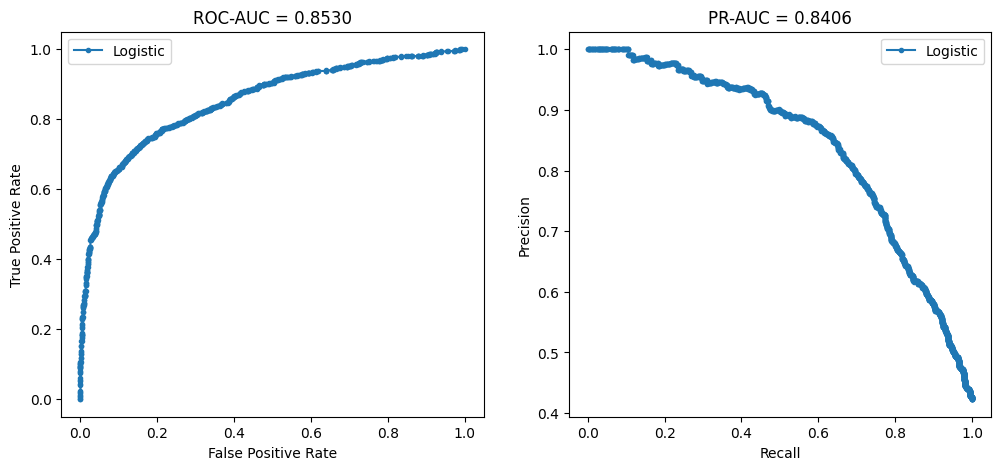

In [12]:
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, auc

fig, axs = pyplot.subplots(1, 2, figsize=(12, 5))

# plot no skill and model roc curves
def plot_roc_curve(test_y, model_probs, ax):
    fpr, tpr, _ = roc_curve(test_y, model_probs)
    ax.plot(fpr, tpr, marker='.', label='Logistic')
    ax.set_title(f'ROC-AUC = {roc_auc_score(test_y, model_probs):.4f}')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend()
    
# plot model precision-recall curves
def plot_pr_curve(test_y, model_probs, ax):
    precision, recall, _ = precision_recall_curve(test_y, model_probs)
    ax.plot(recall, precision, marker='.', label='Logistic')
    ax.set_title(f'PR-AUC = {auc(recall, precision):.4f}')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend()


plot_roc_curve(y_test, y_hat, axs[0])
plot_pr_curve(y_test, y_hat, axs[1])
pyplot.show()

### Imbalanced classes case

In [13]:
negative_class_index = y_test[y_test == 0].index
positive_class_index = y_test[y_test == 1].sample(frac=0.05).index
imbalanced_sumsample_index = negative_class_index.append(positive_class_index)

y_test_imbalanced = y_test.loc[imbalanced_sumsample_index]
y_hat_imbalanced = pipe_classification.predict_proba(X_test.loc[imbalanced_sumsample_index])[:, 1]

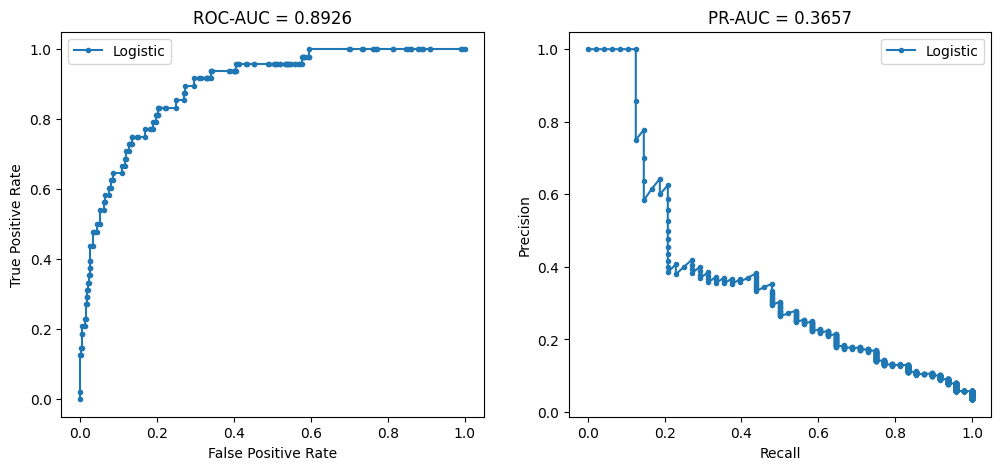

In [14]:
fig, axs = pyplot.subplots(1, 2, figsize=(12, 5))

plot_roc_curve(y_test_imbalanced, y_hat_imbalanced, axs[0])
plot_pr_curve(y_test_imbalanced, y_hat_imbalanced, axs[1])
pyplot.show()

> **Explore**: check multiclass/multilabel extensions (equations and implementations) for all common classification metrics (accuracy, precision, recall, F1/Fbeta)

### Choosing a correct loss function for a given metric optimization
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_sgd_loss_functions_001.png)

In [15]:
from sklearn.linear_model import SGDClassifier

pipe_classification_log_loss = Pipeline([
    ('vectorizer', TfidfVectorizer(
        analyzer='word',
        stop_words='english',
        ngram_range=(1, 3),
        lowercase=True,
        min_df=5,
        max_features=30000
    )),  
    ('classifier', SGDClassifier(loss='log_loss', random_state=42, n_jobs=-1))
])

pipe_classification_log_loss.fit(X_train, y_train)
y_hat_log_loss = pipe_classification_log_loss.predict_proba(X_test)[:, 1]


pipe_classification_huber = Pipeline([
    ('vectorizer', TfidfVectorizer(
        analyzer='word',
        stop_words='english',
        ngram_range=(1, 3),
        lowercase=True,
        min_df=5,
        max_features=30000
    )),  
    ('classifier', SGDClassifier(loss='modified_huber', random_state=42, n_jobs=-1))
])

pipe_classification_huber.fit(X_train, y_train)
y_hat_huber = pipe_classification_huber.predict_proba(X_test)[:, 1]

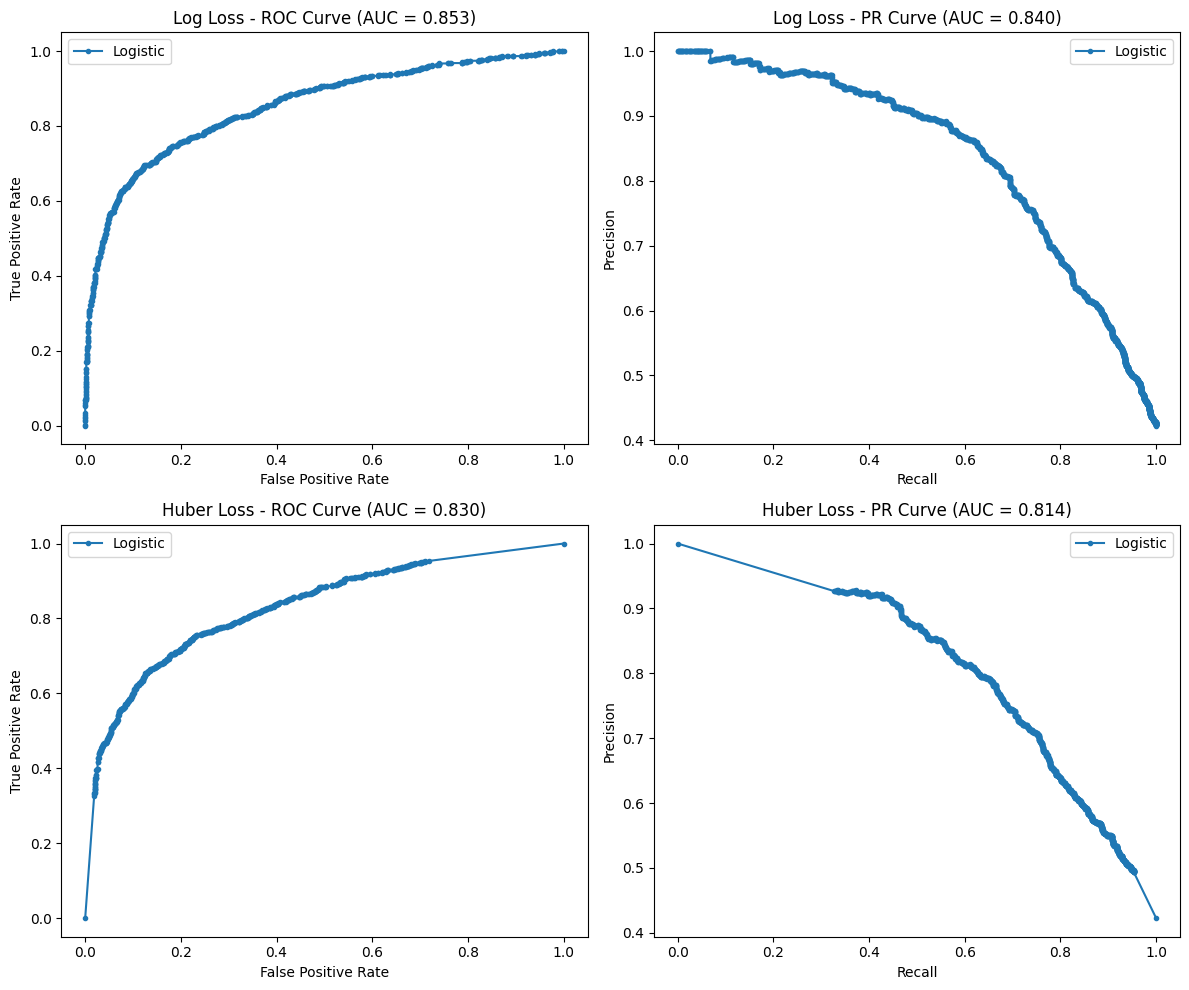

In [16]:
precision_log_loss, recall_log_loss, _ = precision_recall_curve(y_test, y_hat_log_loss)
precision_huber, recall_huber, _ = precision_recall_curve(y_test, y_hat_huber)

fig, axs = pyplot.subplots(2, 2, figsize=(12, 10))

plot_roc_curve(y_test, y_hat_log_loss, axs[0, 0])
plot_pr_curve(y_test, y_hat_log_loss, axs[0, 1])

plot_roc_curve(y_test, y_hat_huber, axs[1, 0])
plot_pr_curve(y_test, y_hat_huber, axs[1, 1])

axs[0, 0].set_title(f'Log Loss - ROC Curve (AUC = {roc_auc_score(y_test, y_hat_log_loss):.3f})')
axs[0, 1].set_title(f'Log Loss - PR Curve (AUC = {auc(recall_log_loss, precision_log_loss):.3f})')
axs[1, 0].set_title(f'Huber Loss - ROC Curve (AUC = {roc_auc_score(y_test, y_hat_huber):.3f})')
axs[1, 1].set_title(f'Huber Loss - PR Curve (AUC = {auc(recall_huber, precision_huber):.3f})')

# Adjust layout and display the subplots
pyplot.tight_layout()
pyplot.show()

### Thoughts about model selection using evaluation metrics

**Within the framework of solving a classification problem, when there are different approaches or models that model the target distribution, in order to compare them with each other, it is better to use AUC-like metrics, since they do not depend on the threshold, and in the case of such metrics, higher values always correspond to a better, in some sense, modeling of the target distribution. But the final business decision usually should be made with respect to "hard" e.g. precision/recall metrics, because in real-life scenarios we usually need "hard" labels and not probabilities.**

<a id='regression_metrics'></a>
## 2.3 Regression metrics

A regression task, in machine learning, is a type of supervised learning problem where the goal is to predict a continuous numeric value or a real number. In regression tasks, the target variable is continuous, and the model's objective is to learn a mapping from input features to this continuous output.

Let's take a look at some common metrics using NLP example [CommonLit - Evaluate Student Summaries](https://www.kaggle.com/competitions/commonlit-evaluate-student-summaries/overview):<br>
The goal of this competition is to assess the quality of summaries written by students in grades 3-12. You'll build a model that evaluates how well a student represents the main idea and details of a source text, as well as the clarity, precision, and fluency of the language used in the summary. You'll have access to a collection of real student summaries to train your model.



In [15]:
!kaggle competitions download -c commonlit-evaluate-student-summaries

# Check if using Windows or Unix-based system
if platform.system() == "Windows":
    !powershell -command Expand-Archive commonlit-evaluate-student-summaries.zip -DestinationPath commonlit-evaluate-student-summaries -Force
else:
    !unzip commonlit-evaluate-student-summaries.zip -d commonlit-evaluate-student-summaries

commonlit-evaluate-student-summaries.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  commonlit-evaluate-student-summaries.zip
  inflating: commonlit-evaluate-student-summaries/prompts_test.csv  
  inflating: commonlit-evaluate-student-summaries/prompts_train.csv  
  inflating: commonlit-evaluate-student-summaries/sample_submission.csv  
  inflating: commonlit-evaluate-student-summaries/summaries_test.csv  
  inflating: commonlit-evaluate-student-summaries/summaries_train.csv  


In [20]:
df_prompts = pd.read_csv('commonlit-evaluate-student-summaries/prompts_train.csv')
df_summaries = pd.read_csv('commonlit-evaluate-student-summaries/summaries_train.csv')
df_prompts.head()

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [21]:
df_summaries.sample(5)

,student_id,prompt_id,text,content,wording
6504,e853a63cd12b,3b9047,The way that the social class were involved in...,-0.157460,-0.165811
4891,ad7245db300c,39c16e,The main person is a likable person that is ne...,-1.547163,-1.461245
681,18ebefa80bfb,3b9047,Social classes showed how powerful you were li...,-0.548304,0.506755
6524,e92e89e68e75,ebad26,there wes no place for the men to wash their h...,-1.547163,-1.461245
4337,99b11d25f3a8,3b9047,The Egyptian social structure was structered l...,-0.993270,-0.367276


![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F9174368%2F195e02a7cf40fbf40e1179bad1cdd017%2Fcontent_wording_graphic.png?generation=1689711455437198&alt=media)

<Axes: >

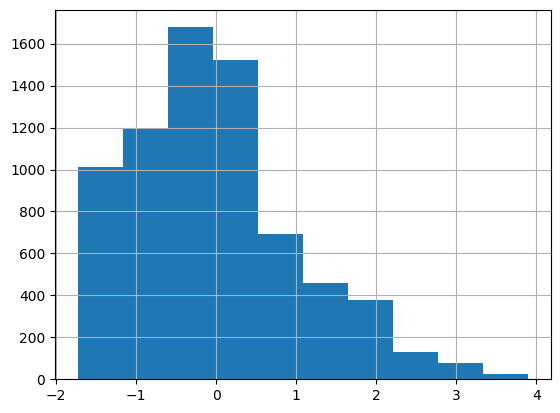

In [22]:
df_summaries.content.hist()

<Axes: >

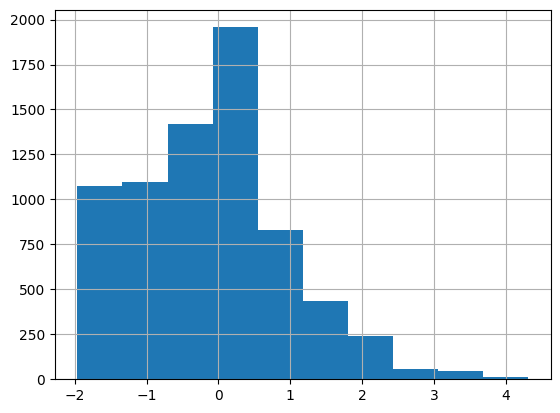

In [23]:
df_summaries.wording.hist()

In [24]:
#straightforward train/test split - this approach is actually SO WRONG here!!

X_train, X_test, y_train, y_test = train_test_split(
    df_summaries.text, df_summaries.wording, test_size=0.3, random_state=42
)

In [25]:
from sklearn.linear_model import Ridge

#modeling and inference

pipe_regression = Pipeline([
    ('vectorizer', TfidfVectorizer(
        analyzer='word',
        stop_words='english',
        ngram_range=(1, 3),
        lowercase=True,
        min_df=5,
        max_features=30000
    )),  
    ('classifier', Ridge(alpha=1.0, random_state=42))
])

pipe_regression.fit(X_train, y_train)

y_hat = pipe_regression.predict(X_test)

**MSE (L2 Loss) and RMSE:** <br>
MSE measures your mean square error from target:


$$ MSE = {\frac{1}{N} \sum_{i=1}^{N}(y_{i}-\hat{y_{i}})^2}$$

$$ RMSE = {\sqrt{MSE}}$$

RMSE and MSE is similiar in terms of minimizers - value minimizes RMSE **if and only if** it minimizes MSE. This means that in terms of competitions we can optimize MSE instead of RMSE. In fact it is easier to work with MSE. But there is a little bit of difference between the two for gradient-based models. The gradient of RMSE with respect to i-th prediction is basically equal to gradient of MSE multiplied by some value. The value doesn't depend on the index I. It means that travelling along MSE gradient is equivalent to traveling along RMSE gradient but with a different flowing rate and the flowing rate depends on MSE score itself. So, it is kind of dynamic.So even though RMSE and MSE are really similar in terms of models scoring, they can be not immediately interchangeable for gradient based methods. We will probably need to adjust some parameters like the learning rate.

##### Pros:
    + Differentiable
    + Could be a loss
    + According to the Gauss-Markov theorem optimizing MSE results in BLUE (The best linear unbiased estimator) for linear models if the conditions of the theorem are fulfilled

##### Cons:
    - Sensitive for outliers: Optimizing MSE could produce a non-robust estimator
    - Doesn't have reference values: without knowing the scale of the target variable it's hard to tell whether e.g. 0.5/5/50 values are good or not

**R-squared** <br>
To see model performance in terms of dummy baseline usually R-squared is used. Or Adjusted R-squared to penalize for model parameters/features

$$ R^2 = 1 - {\frac{MSE}{\frac{1}{N} \sum_{i=1}^{N}(y_{i}-\bar{y_{i}})^2}}$$

In a normal scenario R-squared should be between 0 and 1.

##### Pros:
    + Differentiable
    + Could be a loss
    + Has reference values: < 0 -> model performs worse than the "blind guess"; greater than 0 -> model performs better than the "blind guess"; ~1 - we have a perfect model

##### Cons:
    - Sensitive for outliers
    
#### Outliers case:
![](https://machinelearningmastery.com/wp-content/uploads/2020/03/Comparison-of-Robust-Regression-Algorithms-Line-of-Best-Fit.png)

**MAE (L1 Loss / Manhattan Distance):**

$$ MAE = {\frac{1}{N} \sum_{i=1}^{N}|y_{i}-\hat{y_{i}}|} $$

##### Pros:
    + Differentiable "almost everywhere". Although, it is not differentiable in 0, but you can simply overcome that by coding simple *if else* condition.
    + Could be a loss
    + Less sensitive to outliers, so produces more robust estimators

##### Cons:
    - Doesn't have reference values: without knowing the scale of the target variable it's hard to tell whether e.g. 0.5/5/50 values are good or not


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r_metrics = []
for metric_fn in [mean_squared_error, mean_absolute_error, r2_score]:
    r_metrics.append({'metric': metric_fn.__name__, 'value': metric_fn(y_test, y_hat)})
pd.DataFrame(r_metrics)

,metric,value
0,mean_squared_error,0.474720
1,mean_absolute_error,0.544471
2,r2_score,0.552307


**Pearson Correlation** <br>

The Pearson correlation coefficient, often denoted as "r," is not typically used as a regression loss function in the traditional sense. Instead, it is a measure of the linear relationship or linear association between two continuous variables. It quantifies the strength and direction of the linear relationship between the ground truth target variable and predicted one. The Pearson correlation coefficient ranges from -1 to 1, with the following interpretations: <br>
$$ Cov(Y,\hat{Y}) ={\frac{1}{N-1}} \sum_{i=1}^{N}(y_{i} - \bar{y_{i}})*(\hat{y_{i}} - \bar{\hat{y_{i}}})$$

$$PearsonR = {\frac{Cov(Y,\hat{Y})}{STD(Y)*STD(\hat{Y})}}$$

##### Pros:
    + Differentiable
    + Could be a loss. Although, you need to update standard deviation of y_hat
    + Has reference values: [-1, 0] - negative linear correlation; [0, ~0.5] weak* linear correlation; [0.5-0.9] strong* linear correlation; [0.9-1] - almost perfect model;

##### Cons:
    - We can't say anything about absolute errors knowing only correlation coefficient
    - Could produce a low values, although it could be a solid monotonous correlation between y and y_hat

**Spearman Correlation** <br>

The Spearman Correlation coefficient, is calculated as a Pearson correlation coefficient between ranks of target and predicted variables: <br>

$$SpearmanR = PearsonR(rank(Y), rank(\hat{Y}))$$

##### Pros:
    + Sensitive for monotonous dependencies
    + Has reference values: [-1, 0] - negative monotonous correlation; [0, ~0.5] weak* monotonous correlation; [0.5-0.9] strong* monotonous correlation; [0.9-1] - almost perfect model;

##### Cons:
    - Non-differentiable
    - We can't say anything about absolute errors knowing only correlation coefficient

In [27]:
import numpy as np
from scipy.stats import spearmanr

print(f"""
    Pearson Correlation: {np.corrcoef(y_test, y_hat)[0, 1]};\n
    Spearman Correlation: {spearmanr(y_test, y_hat).correlation}
"""
)


    Pearson Correlation: 0.7455919834167991;

    Spearman Correlation: 0.7181264804610282



> **Explore**: check multivariate extensions (equations and implementations) for all common regression metrics (MAE, MSE, RMSE)

<a id='embedding_metrics'></a>
## 2.4 Embedding metrics

### Embeddings concept:
![](https://miro.medium.com/v2/resize:fit:1200/1*sAJdxEsDjsPMioHyzlN3_A.png)

**Cosine similarity:** <br>

Cosine similarity is a metric used to measure the similarity or cosine of the angle between two non-zero vectors in a multi-dimensional space. It quantifies how similar two vectors are in terms of their directions, regardless of their magnitudes. Cosine similarity is often employed in various fields, including information retrieval, NLP, recommendation systems, to compare and assess the similarity between data points. <br>

Cosine similarity produces a value in the range of -1 to 1:
- If the vectors are identical (i.e., they have the same direction), the cosine similarity is 1.
- If the vectors are orthogonal (i.e., they are at a right angle to each other), the cosine similarity is 0, indicating no similarity.
- If the vectors are pointing in exactly opposite directions, the cosine similarity is -1, indicating maximum dissimilarity.

Key properties of cosine similarity:
- Scale-Invariant: meaning that multiplying all elements in both vectors by a constant factor will not change the cosine similarity.
- Angle Measurement: cosine similarity measures the cosine of the angle between vectors. As the angle decreases (i.e., vectors become more aligned), the cosine similarity value increases.
- Normalized Data: cosine similarity is often used with normalized vectors (i.e., vectors with a magnitude of 1) for consistent comparisons.

**L1(Manhattan)/L2(Eucledean):** <br>
These metrics also could be used as embedding metrics, but they are completely opposite to a cosine similarity in terms of properties

<a id='generative_metrics'></a>
## 2.5 Generative NLP metrics

Text generation is a challenging field. Both academia and the industry continue to struggle for relevant metrics for evaluation of the generative models’ qualities. Each generative task is unique, characterized by its distinct intricacies and idiosyncrasies. 

To check evaluations in NLG, Machine-generated texts are usually evaluated against a target text (ground truth value). This target text is what is expected of the model to ideally generate. Generated text refers to the machine produced texts (output of the model), and target or reference text refers to the original truth value text. 

**BLEU: Bilingual Evaluation Understudy Score**<br>
BLEU is a precision focused metric that calculates n-gram overlap of the reference and generated texts. This n-gram overlap means the evaluation scheme is word-position independent apart from n-grams’ term associations. One thing to note in BLEU — there is a brevity penalty i.e. a penalty applied when the generated text is too small compared to the target text.

BLEU's output is always a number between 0 and 1. This value indicates how similar the candidate text is to the reference texts, with values closer to 1 representing more similar texts. Few human translations will attain a score of 1, since this would indicate that the candidate is identical to one of the reference translations. For this reason, it is not necessary to attain a score of 1. Because there are more opportunities to match, adding additional reference translations will increase the BLEU score. 

You can check in detail the exact algorithm and equations for implementation [here](https://en.wikipedia.org/wiki/BLEU).

In [24]:
from nltk.translate.bleu_score import sentence_bleu

# Reference and candidate sentences as lists of words
reference = ['the quick brown fox jumps over the lazy dog']
candidate = 'the fast brown fox jumps over the lazy dog'

# Calculate BLEU score
bleu_score = sentence_bleu([r.split() for r in reference], candidate.split())

print(f'reference: {reference}')
print(f'candidate: {candidate}')
print("BLEU Score:", bleu_score)
print('\n\n')

# Reference and candidate sentences as lists of words
reference = ['the quick brown fox jumps over the lazy dog', 'the fast brown fox jumps over the lazy dog']
candidate = 'the fast brown fox jumps over the lazy dog'

# Calculate BLEU score
bleu_score = sentence_bleu([r.split() for r in reference], candidate.split())

print(f'references: {reference}')
print(f'candidate: {candidate}')
print("BLEU Score:", bleu_score)
print('\n\n')

# Reference and candidate sentences as lists of words
reference = ['the quick brown fox jumps over the lazy dog']
candidate = 'the quick brown fox jumps over the dog'

# Calculate BLEU score
bleu_score = sentence_bleu([r.split() for r in reference], candidate.split())

print(f'references: {reference}')
print(f'candidate: {candidate}')
print("BLEU Score:", bleu_score)
print('\n\n')

# Reference and candidate sentences as lists of words
reference = ['the quick brown fox jumps over the lazy dog']
candidate = 'fox jumps over the dog'

# Calculate BLEU score
bleu_score = sentence_bleu([r.split() for r in reference], candidate.split())

print(f'references: {reference}')
print(f'candidate: {candidate}')
print("BLEU Score:", bleu_score)
print('\n\n')

# Reference and candidate sentences as lists of words
reference = ['the quick brown fox jumps over the lazy dog']
candidate = 'absolutely random sentence'

# Calculate BLEU score
bleu_score = sentence_bleu([r.split() for r in reference], candidate.split())

print(f'references: {reference}')
print(f'candidate: {candidate}')
print("BLEU Score:", bleu_score)
print('\n\n')

reference: ['the quick brown fox jumps over the lazy dog']
candidate: the fast brown fox jumps over the lazy dog
BLEU Score: 0.7506238537503395



references: ['the quick brown fox jumps over the lazy dog', 'the fast brown fox jumps over the lazy dog']
candidate: the fast brown fox jumps over the lazy dog
BLEU Score: 1.0



references: ['the quick brown fox jumps over the lazy dog']
candidate: the quick brown fox jumps over the dog
BLEU Score: 0.767279645960659



references: ['the quick brown fox jumps over the lazy dog']
candidate: fox jumps over the dog
BLEU Score: 0.31772355751081427



references: ['the quick brown fox jumps over the lazy dog']
candidate: absolutely random sentence
BLEU Score: 0





**BERT Score**<br>
The complete score matches each token in $(x)$ to a token in $(\hat{x})$ to compute recall, and each token in $(\hat{x})$ to a token in $(x)$ to compute precision. We use greedy matching to maximize the matching similarity score, where each token is matched to the most similar token in the other sentence. We combine precision and recall to compute an F1 measure. For a reference $(x)$ and candidate $(\hat{x})$, the recall, precision, and F1 scores are:

$$
R_{\text{BERT}} = \frac{1}{|x|} \sum_{x_i \in x} \max_{\hat{x}_j \in \hat{x}} x_i^{\top} \hat{x}_j
$$

$$
P_{\text{BERT}} = \frac{1}{|\hat{x}|} \sum_{\hat{x}_j \in \hat{x}} \max_{x_i \in x} x_i^{\top} \hat{x}_j
$$

$$
F_{\text{BERT}} = \frac{2 P_{\text{BERT}} \cdot R_{\text{BERT}}}{P_{\text{BERT}} + R_{\text{BERT}}}
$$

Previous work on similarity measures demonstrated that rare words can be more indicative for sentence similarity than common words. BERTscore enables us to easily incorporate importance weighting. Given M reference sentences $(\{x^{(i)}\}_{i=1}^M)$, the idf score of a word-piece token \( w \) is:

$$
\text{idf}(w) = -\log \frac{1}{M} \sum_{i=1}^M \mathbb{I}[w \in x^{(i)}],
$$


Illustration of the computation of the recall metric:
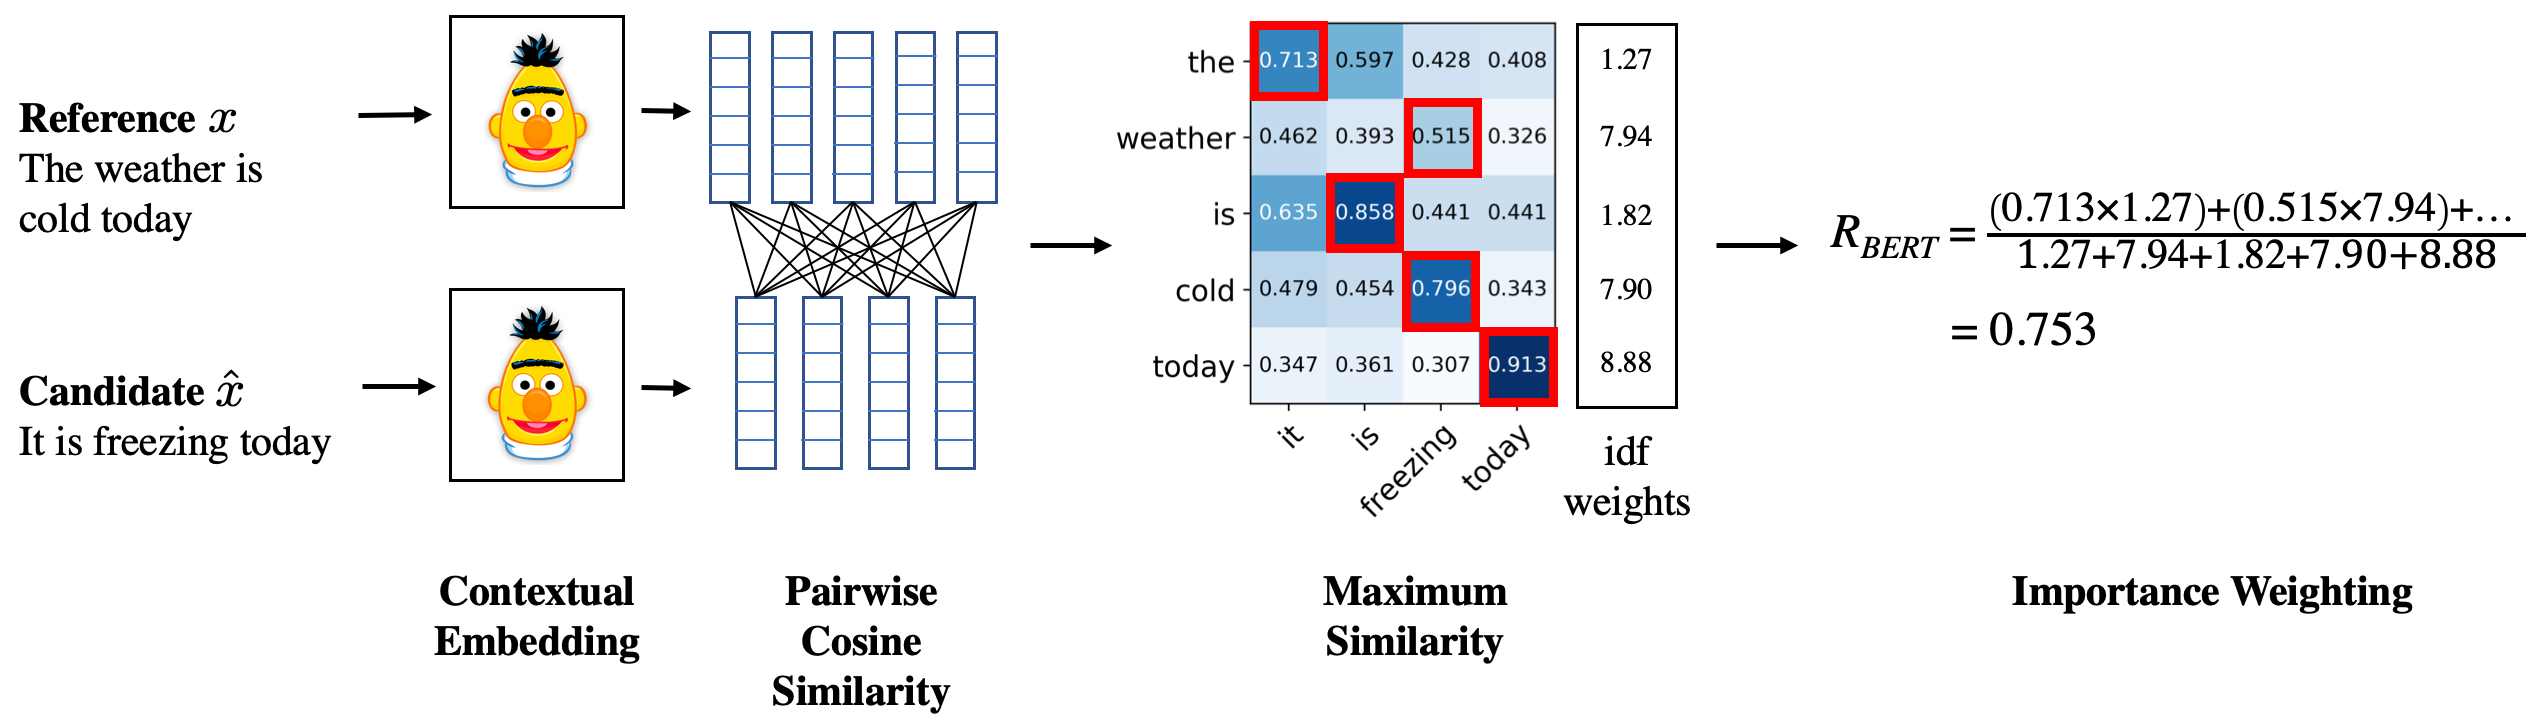

In [34]:
from evaluate import load
bertscore = load("bertscore")

# Reference and candidate sentences as lists of words
reference = ['the quick brown fox jumps over the lazy dog']
candidate = ['the fast brown fox jumps over the lazy dog']

bert_score = bertscore.compute(predictions=candidate, references=reference, lang="en")

print(f'reference: {reference}')
print(f'candidate: {candidate}')
print("BERT Score:", bert_score)
print('\n\n')

# Reference and candidate sentences as lists of words
reference = ['the quick brown fox jumps over the lazy dog and then they jumped together']
candidate = ['the fast brown fox jumps over the lazy dog']

bert_score = bertscore.compute(predictions=candidate, references=reference, lang="en")

print(f'reference: {reference}')
print(f'candidate: {candidate}')
print("BERT Score:", bert_score)
print('\n\n')

# Reference and candidate sentences as lists of words
reference = ['the quick brown fox jumps over the lazy dog']
candidate = ['the quick brown fox jumps over the dog']

bert_score = bertscore.compute(predictions=candidate, references=reference, lang="en")

print(f'reference: {reference}')
print(f'candidate: {candidate}')
print("BERT Score:", bert_score)
print('\n\n')

# Reference and candidate sentences as lists of words
reference = ['the quick brown fox jumps over the lazy dog']
candidate = ['fox jumps over the dog']

bert_score = bertscore.compute(predictions=candidate, references=reference, lang="en")

print(f'reference: {reference}')
print(f'candidate: {candidate}')
print("BERT Score:", bert_score)
print('\n\n')

# Reference and candidate sentences as lists of words
reference = ['the quick brown fox jumps over the lazy dog']
candidate = ['absolutely random sentence']

bert_score = bertscore.compute(predictions=candidate, references=reference, lang="en")

print(f'reference: {reference}')
print(f'candidate: {candidate}')
print("BERT Score:", bert_score)
print('\n\n')

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


reference: ['the quick brown fox jumps over the lazy dog']
candidate: ['the fast brown fox jumps over the lazy dog']
BERT Score: {'precision': [0.990463137626648], 'recall': [0.990463137626648], 'f1': [0.990463137626648], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.44.2)'}



reference: ['the quick brown fox jumps over the lazy dog and then they jumped together']
candidate: ['the fast brown fox jumps over the lazy dog']
BERT Score: {'precision': [0.9728831052780151], 'recall': [0.9291043281555176], 'f1': [0.95048987865448], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.44.2)'}



reference: ['the quick brown fox jumps over the lazy dog']
candidate: ['the quick brown fox jumps over the dog']
BERT Score: {'precision': [0.9942835569381714], 'recall': [0.9814068078994751], 'f1': [0.9878032207489014], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.44.2)'}



reference: ['the quick brown fox jumps over the lazy dog']
candidate: ['fox 

<a id='rag_metrics'></a>
## 2.6 RAG metrics
RAG concept
RAG or Retrieval Augmented Generation, is a system that stores documents in a database, allowing users to pose questions about them. These inquiries can range from specific details, summaries, and comparisons to even generating new text based on the stored documents.

To illustrate this, consider the following use case: Improving the efficiency of lawyers searching for information. Typically, a RAG system is developed using a company’s documents database. In this way, instead of spending a long time searching for information in lengthy documents, you can simply consult the RAG system, which presents the precise information they are looking for in a very short time.
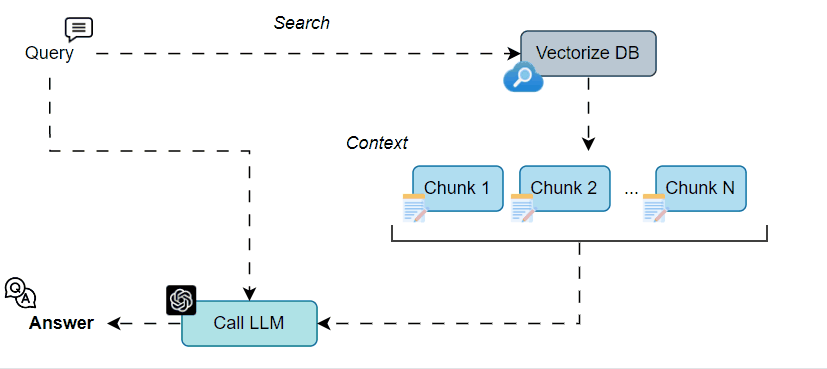

### Precision at K ($P@k$), Average Precision at K ($AP@k$), and Mean Average Precision at K ($MAP@k$)

#### 1. Precision at K ($P@k$)

**Definition**: Precision at $k$ (denoted as $P@k$) is the proportion of relevant items among the top $k$ items in a ranked list. It measures how many of the top $k$ results are relevant.

**Formula**:
$$
P@k = \frac{\text{Number of relevant items in the top } k}{k}
$$

If $\text{rel}(i)$ is an indicator function that equals 1 if the item at position $i$ is relevant and 0 otherwise, the formula can be rewritten as:
$$
P@k = \frac{\sum_{i=1}^{k} \text{rel}(i)}{k}
$$

**Example**:

Suppose we have a ranked list of 5 items and the top 3 items are considered. The relevant items are at positions 1, 3, and 4. To calculate $P@3$:

- Top 3 items: [1 (relevant), 2 (irrelevant), 3 (relevant)]
- Relevant items in the top 3: 2

$$
P@3 = \frac{2}{3} \approx 0.67
$$

#### 2. Average Precision at K ($AP@k$)

**Definition**: Average Precision at $k$ (denoted as $AP@k$) is the average of precision values computed at each position in the ranked list up to $k$, considering only positions where a relevant item is found. It captures how relevant items are distributed throughout the top $k$ ranks.

**Formula**:
$$
AP@k = \frac{1}{\min(R, k)} \sum_{i=1}^{k} P@i \times \text{rel}(i)
$$
Where $R$ is the total number of relevant items in the list, and $P@i$ is the precision at position $i$.

**Example**:

Using the same list as the previous example:

- Top 3 items: [1 (relevant), 2 (irrelevant), 3 (relevant)]
- $P@1 = \frac{1}{1} = 1$
- $P@2 = \frac{1}{2} = 0.5$ (since the 2nd item is irrelevant)
- $P@3 = \frac{2}{3}$

Now, compute $AP@3$:
$$
AP@3 = \frac{1}{\min(2, 3)} \left( P@1 \times 1 + P@2 \times 0 + P@3 \times 1 \right) = \frac{1}{2} \left(1 + 0 + \frac{2}{3}\right) = \frac{5}{6} \approx 0.83
$$

#### 3. Mean Average Precision at K ($MAP@k$)

**Definition**: Mean Average Precision at $k$ (denoted as $MAP@k$) is the mean of the $AP@k$ values over multiple queries. It gives an overall measure of the precision across a set of ranked lists.

**Formula**:
$$
MAP@k = \frac{1}{N} \sum_{j=1}^{N} AP@k_j
$$
Where $N$ is the total number of queries, and $AP@k_j$ is the average precision at $k$ for the $j$-th query.

<a id='arena_metrics'></a>
## 2.7 Pairwise arena evaluation
[LMSYS Arena](https://lmarena.ai/)
General idea:
- Ask any question to two anonymous models (e.g., ChatGPT, Gemini, Claude, Llama) and vote for the better one!
- You can continue chatting until you identify a winner.
- Vote won't be counted if model identity is revealed during conversation. <br>
Based on human votes ELO rating is computer for every model.

### ELO Rating Calculations
The ELO rating is updated using the following formula:

$$
R' = R + K \times (S - E)
$$

Where:
- $R$ is the current rating of the model.
- $R'$ is the updated rating after a match.
- $K$ is a constant that determines the sensitivity of rating changes (commonly, $K = 32$).
- $S$ is the actual score from the match (1 for a win, 0.5 for a draw, and 0 for a loss).
- $E$ is the expected score based on the current ratings of the two models.

### Expected Score Calculation

The expected score ($E$) for model A against model B is calculated using:

$$
E_A = \frac{1}{1 + 10^{(R_B - R_A) / 400}}
$$

Similarly, for model B:

$$
E_B = \frac{1}{1 + 10^{(R_A - R_B) / 400}}
$$

Here, $R_A$ and $R_B$ are the current ratings of models A and B, respectively.

### Toy Example

Suppose we have two models in the LMSYS Arena:
- **Model A** with an initial rating of 1600.
- **Model B** with an initial rating of 1400.

### Step 1: Calculate Expected Scores

The expected score for Model A ($E_A$):

$$
E_A = \frac{1}{1 + 10^{(1400 - 1600) / 400}} = \frac{1}{1 + 10^{-0.5}} \approx 0.76
$$

The expected score for Model B ($E_B$):

$$
E_B = \frac{1}{1 + 10^{(1600 - 1400) / 400}} = \frac{1}{1 + 10^{0.5}} \approx 0.24
$$

### Step 2: Update Ratings Based on Match Outcome

Let's say Model A wins the match. The actual score ($S$) for Model A is 1, and for Model B, it is 0.

Using the ELO rating update formula:
- For Model A:

  $$
  R'_A = 1600 + 32 \times (1 - 0.76) = 1600 + 32 \times 0.24 = 1600 + 7.68 \approx 1608
  $$

- For Model B:

  $$
  R'_B = 1400 + 32 \times (0 - 0.24) = 1400 - 32 \times 0.24 = 1400 - 7.68 \approx 1392
  $$

After the match, the new ratings are:
- **Model A**: 1608
- **Model B**: 1392

This update reflects the fact that Model A's victory was somewhat expected based on its higher initial rating, hence the relatively small rating change.

- **ELO rating** changes are influenced by the difference in ratings between competitors.
- The greater the difference in ratings, the smaller the rating change for the expected winner.
- The $K$ factor controls the sensitivity of the rating updates. A higher $K$ results in more significant changes after each match.


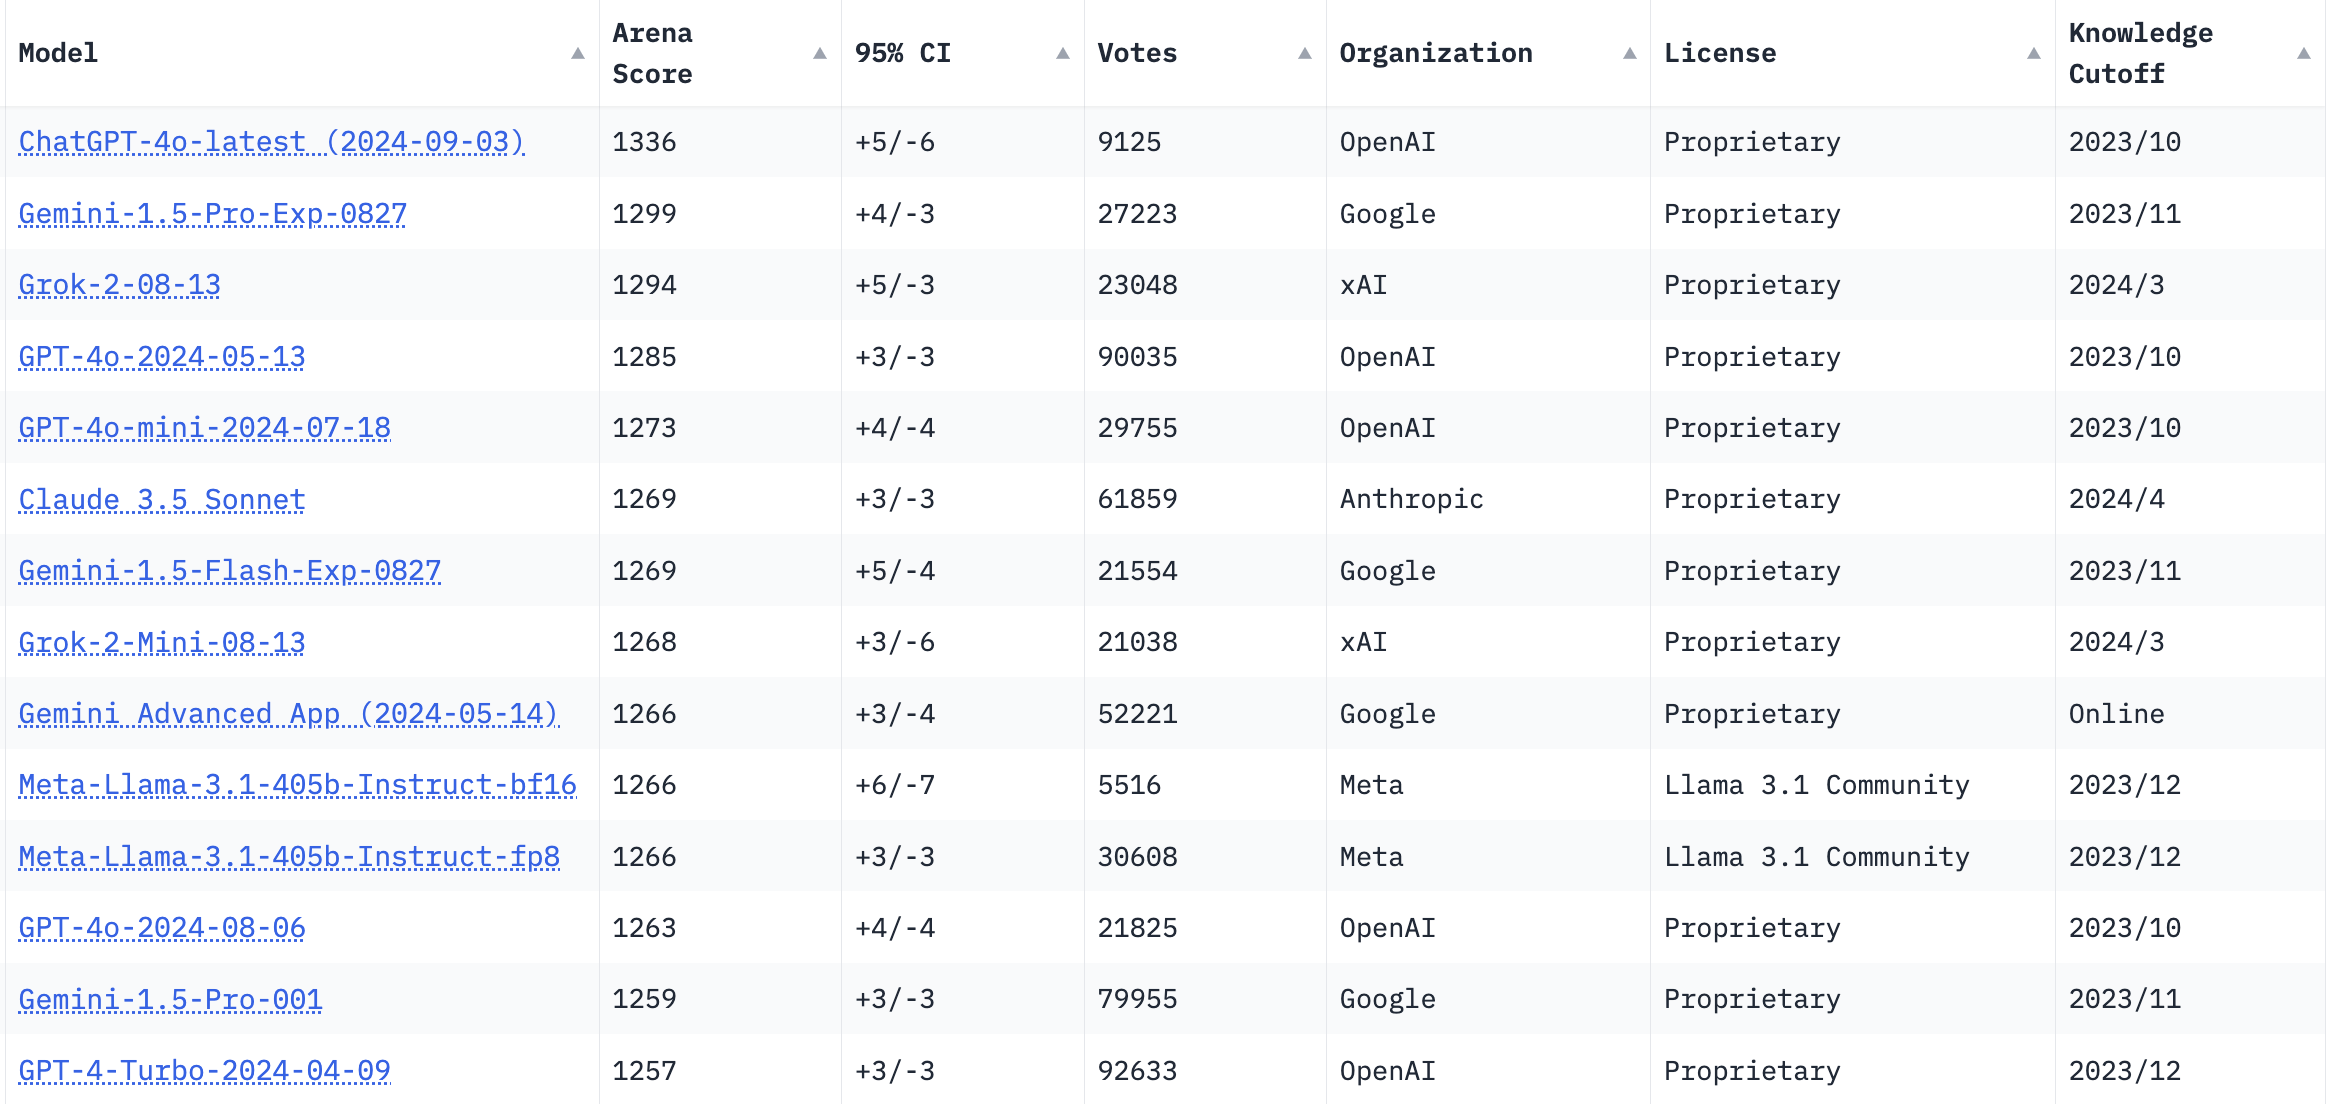

<a id='validation_strategies'></a>
# 3. Validation Strategies

<a id='overfitting'></a>
## 3.1 Overfitting. Why do we need train/test concept? <br>

We really don’t want to train and evaluate our model on the same dataset, since it would produce overfitting. In other words, we can’t tell whether the model simply memorized the training data or not, or whether it generalizes well to new, unseen data.

Let's look at the problem in more detail using a simple toy example:

In [35]:
import numpy as np
np.random.seed(42)

X_train = np.random.normal(0, 1, (500, 2))
noise_train = np.random.normal(0, 1., 500)

X_test = np.random.normal(0, 1, (100, 2))
noise_test = np.random.normal(0, 1., 100)

y_train = (np.sin(X_train) + np.cos(2*X_train)).sum(axis=1) + noise_train
y_test = (np.sin(X_test) + np.cos(2*X_test)).sum(axis=1) + noise_test

In [36]:
lr = Ridge(alpha=1.0, random_state=42)
lr.fit(X_train, y_train)

y_train_preds = lr.predict(X_train)
y_test_preds = lr.predict(X_test)

print(f'MSE on train: {mean_squared_error(y_train, y_train_preds)}\nMSE on test: {mean_squared_error(y_test, y_test_preds)}')

MSE on train: 2.046936920069584
MSE on test: 1.8647307030508085


Let's add some complexity (polynomial features) to the model and see what will happen with our metrics.

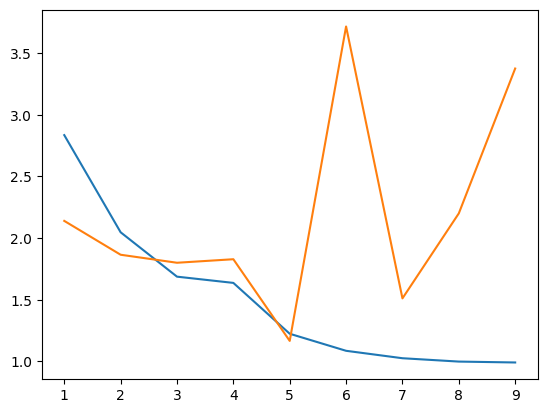

In [37]:
from matplotlib import pyplot as plt

train_result = []
test_result = []

for pow_n in range(1, 10):
    lr = Ridge(alpha=1.0, random_state=42)

    X_train_poly = np.hstack([X_train**(p) for p in range(pow_n)])
    X_test_poly = np.hstack([X_test**(p) for p in range(pow_n)])

    lr.fit(X_train_poly, y_train)

    y_train_preds = lr.predict(X_train_poly)
    y_test_preds = lr.predict(X_test_poly)
    
    train_result.append(mean_squared_error(y_train, y_train_preds))
    test_result.append(mean_squared_error(y_test, y_test_preds))
    
plt.plot(list(range(1, 10)), train_result, list(range(1, 10)), test_result)
plt.show()

Conclusion:
- We almost always can reach optimal loss (in MSE case ~0) for the training set by adding nonlinear feature / stacking more layers to the model
- We shouldn't stack layers and add features without proper control, because then we will get poor results in real-life testing / competition leaderboard
- So we need to somehow model real testing data using the only training dataset available

![](https://preview.redd.it/n9fgba8b0qr01.png?auto=webp&s=e86d2d3447c777d3222016e81a0adfaec1a95592)

<a id='holdout'></a>
## 3.2 Holdout / Stratified split / train-validation-test <br>

The holdout method is the simplest model evaluation technique. We take our labeled dataset and split it randomly into two parts: A **training set** and a **test set**:
![](https://sebastianraschka.com/images/blog/2016/model-evaluation-selection-part1/testing_01.png)
Then, we fit a model to the training data and predict the labels of the test set:
![](https://sebastianraschka.com/images/blog/2016/model-evaluation-selection-part1/testing_02.png)
And the fraction of correct predictions constitutes our estimate of the prediction accuracy.
![](https://sebastianraschka.com/images/blog/2016/model-evaluation-selection-part1/testing_03.png)

##### Pros:
    + Simple
    + Fast

##### Cons:
    - Not so precise estimate of out-of-sample performance comparing to more advanced techniques
    
### Class Balance

As it was said, you want your validation to mimic your test set as close as possible. And you can make a fair assumprion (that is not always true), that distribution of target on train and not seen data is the same. Then you have to use stratification. Stratification ensures stable distributions across split. That is more than just useful if:

    + Dataset is small
    + Dataset is unbalanced (average target close to 0 or to 1)
    + You have multiclassification task
    
    
### Model Checkpoint Selection

If we consider gradient-based training of models, for example neural networks or gradient boosting, then as a result of each epoch there will be some new model weights. Thus, the model at different epochs will behave differently on previously unseen data, so it is logical for the best result to choose a checkpoint from the epoch at which the target metric has the best values on previously unseen data.

However, by selecting the weights of the model in this way, we can also get some kind of overfit, since we choose these weights as the best according to the validation dataset, it is quite obvious that on average on any other previously unseen dataset the results of our model in terms of metrics will be worse.

Thus, in order to correctly select a model checkpoint after optimization or implement early stopping and also correctly estimate the results of the model on previously unseen data, we can apply train/validation/test strategy.

![](https://editor.analyticsvidhya.com/uploads/18265Screenshot-from-2020-10-06-16-35-50-768x432.png)

In [38]:
#straightforward train/test split

X_train, X_test, y_train, y_test = train_test_split(
    df_twitter.text, df_twitter.target, test_size=0.3, random_state=42
)
y_train.mean(), y_test.mean()

(0.43253893788703324, 0.42294220665499127)

In [39]:
#stratified train/test split

X_train, X_test, y_train, y_test = train_test_split(
    df_twitter.text, df_twitter.target, test_size=0.3, random_state=42, stratify=df_twitter.target
)
y_train.mean(), y_test.mean()

(0.429724150872584, 0.4295096322241681)

<a id='kfold'></a>
## 3.3 K-fold / Stratified K-fold / Repeated K-fold

**K-fold Cross-validation** is probably the most common technique for model evaluation and model selection. 
- We split the dataset into *K* parts and iterate over a dataset set *K* times
- In each round one part is used for validation, and the remaining *K-1* parts are merged into a training subset for model evaluation
- We compute the cross-validation performance as the arithmetic mean over the *K* performance estimates from the validation sets.
![](https://sebastianraschka.com/images/blog/2016/model-evaluation-selection-part3/kfold.png)


**Stratified K-fold Cross-validation** - we use k-fold as described above, but we will use stratification by target on each split. <br>

**Repeated K-fold Cross-validation** - we use k-fold as described above, but we will run the whole process n times with different randomizations durig split. This strategy could be useful if we have a small dataset available and the metric varies significantly from fold to fold.<br>

##### Pros:
    + Better estimate of out-of-sample performance than simple train/test split

##### Cons:
    - Runs "K" times slower than simple train/test split

If we have **little data** and **enough time**, it's better to always do cross-validation for a more precise estimate of performance.

In [40]:
#stratified train/test split

X_train, X_test, y_train, y_test = train_test_split(
    df_twitter.text, df_twitter.target, test_size=0.3, random_state=42, stratify=df_twitter.target
)
y_train.mean(), y_test.mean()


print('Holdout result:')
pipe_classification.fit(X_train, y_train)
roc_auc_score(y_test, pipe_classification.predict_proba(X_test)[:, 1])

Holdout result:


0.860422079369885

In [41]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Perform cross-validation and calculate AUC scores for each fold
auc_scores = cross_val_score(pipe_classification, df_twitter.text, df_twitter.target, cv=cv, scoring='roc_auc')
print(auc_scores)
print(f'Mean: {round(auc_scores.mean(), 4)}')
print(f'Std: {round(auc_scores.std(), 4)}')
print(f'3 std range: [{round(auc_scores.mean() - 3*auc_scores.std(), 4)}, {round(auc_scores.mean() + 3*auc_scores.std(), 4)}]')

[0.8664237  0.85559864 0.86127231 0.84777092 0.84860123 0.86249396
 0.85747738]
Mean: 0.8571
Std: 0.0065
3 std range: [0.8376, 0.8766]


<a id='timebased'></a>
## Time-based validation / Time K-fold

Doing **Time validation** in correct way is very important. Suppose you have a task to predict Wikipedia page viewers as in on of previous Kaggle competitions (https://www.kaggle.com/c/web-traffic-time-series-forecasting). What are possible ways to do a validation? Again, it is best to mimic split made by organizers and they split this by date. All before January, 1st, 2017 went to train, all after that date (2 months) - to test. The correct way to perform a split is with **sliding window**. Another possible option is to add as much train data from the past as possible on each fold **expanding window**:
 
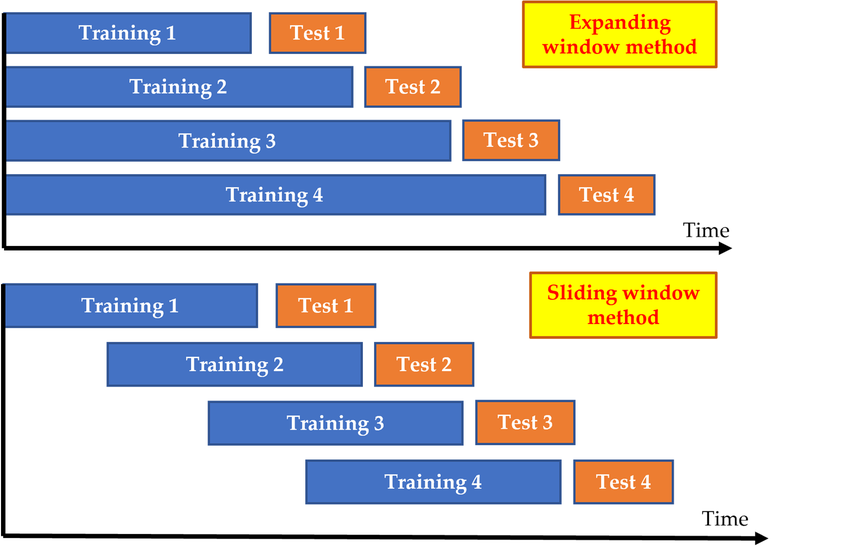

In NLP, such a split is not very common, but in some cases it can be used if there is a clear bias in the texts that is caused by time. For example, the topic of news and articles in different social media websites changes over time, or over long periods in fiction books the vocabulary and grammar of the language itself changes.

<a id='groupkfold'></a>
## 3.5 Group K-fold <br>

- The dataset is divided into k folds, just like traditional k-fold cross-validation.
- Instead of random assignment to folds, GroupKFold ensures that all data points with the same group label (or identifier) are placed in the same fold.
- During each iteration of cross-validation, one of the k folds is used as the test set, while the remaining k-1 folds are used as the training set. Importantly, data points with the same group label are kept together in either the training set or the test set.
- The cross-validation process is repeated k times, with each of the k folds serving as the test set exactly once.

Group K-fold plays a very important role in NLP, there are several task examples:
- Authorship Attribution: you may have a dataset of texts written by various authors. You want to evaluate a machine learning model's ability to predict the correct author of a text or to have ability to predict different text attributes or properties for previously unseen authors. To avoid data leakage, you can use GroupKFold with author IDs as the grouping variable. This ensures that all texts from the same author are in the same fold during cross-validation.
- Sentiment Analysis: In sentiment analysis tasks, where you classify text based on sentiment (e.g., positive, negative, neutral), you might have reviews or comments grouped by products, movies, or topics. GroupKFold helps ensure that all reviews for a specific product or movie are together in one fold during cross-validation.
- Topic Modeling: In topic modeling tasks, where you aim to discover latent topics within a collection of documents, you can use GroupKFold to group documents by source or domain, ensuring that all documents from the same source are in the same fold during cross-validation.

<a id='strategychoose'></a>
## Choosing the right strategy for real-life scenarios and competition LB consistency

In [42]:
models = {
    'baseline_lr': Pipeline([
        ('vectorizer', TfidfVectorizer(
            analyzer='word',
            stop_words='english',
            ngram_range=(1, 3),
            lowercase=True,
            min_df=5,
            max_features=30000
        )),  
        ('classifier', LogisticRegression(C=1.0, random_state=42))
    ]),
    'baseline_svc': Pipeline([
        ('vectorizer', TfidfVectorizer(
            analyzer='word',
            stop_words='english',
            ngram_range=(1, 3),
            lowercase=True,
            min_df=5,
            max_features=30000
        )),  
        ('classifier', SGDClassifier(loss='hinge', random_state=42))
    ]),
    'baseline_lr_huber': Pipeline([
        ('vectorizer', TfidfVectorizer(
            analyzer='word',
            stop_words='english',
            ngram_range=(1, 3),
            lowercase=True,
            min_df=5,
            max_features=30000
        )),  
        ('classifier', SGDClassifier(loss='modified_huber', random_state=42))
    ])
}

In [43]:
df_twitter_unseen_test = pd.read_csv('nlp-getting-started/test.csv')

According to what we know about the competition itself and the LB split - there is no time component in the LB split, it seems that there is also no group component (by location/by author, etc.) in the LB split, so it is quite safe for now to assume that the regular stratified split / stratified K-fold split is the best option to use for this case. So we will use StratifiedKFold with K=7.

> **TODO**: Imagine that you are in production developing a similar system for Twitter for identifying real disasters, think about whether the split proposed by the organizers (random, possibly with stratification by target) is optimal for validation (assume that you have all the possible necessary data here)?

There is also one significant nuance here - according to my experiments (LB probbing) and kaggle [discussions](https://www.kaggle.com/competitions/nlp-getting-started/discussion/123165) - **Mean F1** or F1 with macro averaging was actually used instead of a regular binary F1 score for LB metric calculation, although there is no direct mention of this fact in the [overview section](https://www.kaggle.com/competitions/nlp-getting-started/overview).

In [44]:
from sklearn.model_selection import cross_val_predict

results = []

for model_name, model in models.items():
    scores = []
    cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
    for train_ind, test_ind in cv.split(df_twitter.text, df_twitter.target):
        X_train, X_test = df_twitter.text.iloc[train_ind], df_twitter.text.iloc[test_ind]
        y_train, y_test = df_twitter.target.iloc[train_ind], df_twitter.target.iloc[test_ind]
        model.fit(X_train, y_train)
        y_hat = model.predict(X_test)
        scores.append(
            f1_score(
                y_test, 
                y_hat, 
                average='macro'
            )
        )
        
    scores = np.array(scores)
    avg_score = round(scores.mean(), 4)
    std_score = round(scores.std(), 4)
    min_score = round(scores.min(), 4)
    max_score = round(scores.max(), 4)
    score_lower_bound = round(avg_score - 3*std_score, 4)
    score_higher_bound = round(avg_score + 3*std_score, 4)
    results.append({
        'experiment': model_name,
        'f1_avg': avg_score,
        'f1_std': std_score,
        'f1_min': min_score,
        'f1_max': max_score,
        'f1_lower_bound_estimation': score_lower_bound,
        'f1_higher_bound_estimation': score_higher_bound
    })
    model.fit(df_twitter.text, df_twitter.target)
    df_twitter_unseen_test[f'prediction_{model_name}'] = model.predict(df_twitter_unseen_test.text)
    
results = pd.DataFrame(results).sort_values('f1_avg')
results

,experiment,f1_avg,f1_std,f1_min,f1_max,f1_lower_bound_estimation,f1_higher_bound_estimation
2,baseline_lr_huber,0.7682,0.0092,0.7517,0.7806,0.7406,0.7958
1,baseline_svc,0.7838,0.0114,0.7691,0.8052,0.7496,0.8180
0,baseline_lr,0.7910,0.0106,0.7740,0.8066,0.7592,0.8228


In [46]:
for model in models.keys():
    df_twitter_unseen_test.rename(columns={f'prediction_{model}': 'target'})[['id', 'target']].to_csv(
        f'nlp-getting-started/{model}_submission.csv', index=False
    )

![](images/photo1696939101.jpeg)

So, we have a perfect match in terms of absolute values of F1 metric - LB metric value is in range of $[min(F1), max(F1)]$, and we have a perfect correlation between the increase in the evaluation metric on the local validation $avg(F1)$ and on the public leaderboard (unseen test) - smaller increase on the local val results smaller increase on the LB and higher increase on the local val results higher increase on the LB. 


In different competition and real-life scenarios there could be cases in which you won't have an absolute values match for your metrics or there will be no correlation between local validation increase and LB increase or even both, but correlation of gains (better val -> better LB) is often preferable to exact match of absolute values for individual experiments.

<a id='validation_mismatch'></a>
# 4. Local validation VS real-life / competition testing metrics mismatch <br>

Sometimes there are situations in which your evaluation metrics in your local validation differ significantly from the actual metrics in the production or in the competition test dataset. 

There are several aspects of the problem:

<a id='wrong_local_validation'></a>
## 4.1 Wrong local validation strategy 
- There is a significant time component in your data and you don't use time-based split
- The group-split strategy (by users/by locations, etc.) is needed and you missed it
- A more advanced combination of time and group split is needed
- If there is a huge gap between validation and real-life/lb, while train and val scores are similar - you certainly have a data leak. Carefuly review your EDA. Try to remove most predictive features and compare the results.
- Consider different metrics, so maybe it will give you an idea of what is going on (roc-auc/pr-auc example)
- Competition hosts didn't say about some aspects of split or metric calculation no matter by accident or on purpose, so you need to consider and try different options although these options may not directly correspond to what is written in the description section.

**If you're a competition participant - try to reproduce the actual validation split and metric that was made by competition hosts at all costs. And it doesn’t matter whether the split/metric is relevant to the business task itself or even common sense - your goal here is to win the competition.** <br>


**If you're solving a production task / you're a competition host - try to create validation split that is relevant to real life scenarios and evaluation metric that is relevant to business metrics at all costs. Your goal here is to build the solid and reliable solution with the expected performance in real life.**

<a id='shifted_features'></a>
## 4.2 Shifted features distributions

Another common problem - natural features distributions shift.
- The most common cases happen in analysis financial markets: the distribution of stock prices, trading volumes, or volatility can change due to market conditions or economic events.
- Another popular case is recommender systems, because user preferences or behaviors in recommender systems may evolve, leading to shifts in the distribution of user interaction data.
- There are also some cases in NLP, e.g. in sentiment analysis, language style, topics, or writing conventions may change over time, causing shifts in the distribution of text data.
- And the last but not the least: such problems can be caused by errors and bugs in your data collection and processing pipelines and it could turn out that train, test and real-life online data are actually collected in a slightly different ways under the hood.

Let's replicate toy example with feature collection bug

In [47]:
df_available_train, df_unseen_test = train_test_split(
    df_twitter, stratify=df_twitter.target, test_size=0.3, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    df_available_train.text, df_available_train.target, stratify=df_available_train.target, test_size=0.3, random_state=42
)

In [48]:
pipe_classification.fit(X_train, y_train)

proba = pipe_classification.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, proba)

0.845906273142828

In [49]:
proba = pipe_classification.predict_proba(df_unseen_test.text)[:, 1]
roc_auc_score(df_unseen_test.target, proba)

0.8525311697384613

So, in a normal scenario there is no huge difference betweeen "local" and "unseen data" validation.

Let's replicate bug in which we lose some parts of input text in the "unseen data".
With this "bug" we have a ~5% drop in roc-auc metric

In [50]:
import random

def string_rand_filtering(text, ratio_drop=0.5):
    words = text.split()
    num_words_to_delete = int(ratio_drop * len(words))
    words_to_delete = random.sample(words, num_words_to_delete)
    modified_text = ' '.join(word for word in words if word not in words_to_delete)
    return modified_text

df_unseen_test_corrupted = df_unseen_test.copy()
df_unseen_test_corrupted.text = df_unseen_test_corrupted.text.apply(string_rand_filtering)

proba = pipe_classification.predict_proba(df_unseen_test_corrupted.text)[:, 1]
roc_auc_score(df_unseen_test_corrupted.target, proba)

0.799785330332339

Is there a way to detect that something is wrong with the test data in terms of features distribution in a semi-automated way? - **Yes!**

<a id='adversarial_validation'></a>
# 4.3 Adversarial validation

The general idea is to check the degree of similarity between training and tests in terms of feature distribution: if they are difficult to distinguish, the distribution is probably similar and the usual validation techniques should work.
If it does not seem to be the case, so we can suspect they are quite different. This intuition can be quantified by combining train and test sets, assigning 0/1 labels (0 — train, 1-test), and evaluating a binary classification task. For adversarial validation, we want to create a model that predicts which rows are in the training dataset, and which are in the test set. We, therefore, create a new target column in which the test samples are labeled 1 and the train samples with 0. <br>

**Note:** The Performance of this model will be indicator of how big the problem is. In order to make it work we need to use the model of the same complexity for both the main problem and adversarial validation problem.

In [51]:
df_adversarial = pd.concat([df_available_train, df_unseen_test]).reset_index()
df_adversarial.target = len(df_available_train)*[0] + len(df_unseen_test)*[1]

X_train_adv, X_val_adv, y_train_adv, y_val_adv = train_test_split(
    df_adversarial.text, df_adversarial.target, stratify=df_adversarial.target, test_size=0.3, random_state=42
)

pipe_classification.fit(X_train_adv, y_train_adv)

proba = pipe_classification.predict_proba(X_val_adv)[:, 1]
roc_auc_score(y_val_adv, proba)

0.503320049483482

Adversarial validation for the initial complete test dataset - ROCAUC=0.5 means that it's impossible to tell whether this particular sample is from the train set or from the unseen test, so we don't have any significant features distributions shift.

In [52]:
df_adversarial = pd.concat([df_available_train, df_unseen_test_corrupted]).reset_index()
df_adversarial.target = len(df_available_train)*[0] + len(df_unseen_test_corrupted)*[1]

X_train_adv, X_val_adv, y_train_adv, y_val_adv = train_test_split(
    df_adversarial.text, df_adversarial.target, stratify=df_adversarial.target, test_size=0.3, random_state=42
)

pipe_classification.fit(X_train_adv, y_train_adv)

proba = pipe_classification.predict_proba(X_val_adv)[:, 1]
roc_auc_score(y_val_adv, proba)

0.6698465738166647

Adversarial validation for the corrupted test dataset - ROCAUC=0.68 means that in many cases we can tell whether this particular sample is from the train set or from the unseen test, so we obviously have a features distributions shift.

# Self-assessment questions

**Theory** (5 points):

>List of questions:
> - A model has high accuracy (e.g. 95%) but low precision (e.g. 10%) and recall (e.g. 10%) on the positive class in a binary classification problem. What could be happening and should we describe this kind of performance as "rather good, because the accuracy is high" or "rather bad, because the precision/recall/f1 is low"?
> - Describe cases (or provide examples) in which in a multiclass classification problem the values of F1 macro will be greater than F1 micro and vice versa? What do you think happens more often in practice and why?
> - Imagine that you are in production developing a similar system for Twitter for identifying real disasters, think about whether the split proposed in the kaggle competition (random, possibly with stratification by target) is optimal for a production model validation (assume that you have all the possible necessary data here) and if you think it could be not optimal - describe your ideas?
> - For the task of recognizing disasters from tweets and quickly reacting to them by the relevant government authorities, describe cases or pipelines for processing suspected disasters for which a precision-optimized model would be more useful, and for which a recall-optimized one?
> - For a task similar to the one proposed above (commonlit-evaluate-student-summaries) regression for both targets with the same input tables structure (assume that the uniqueness/non-uniqueness of ids fields corresponds to the proposed here problem statement), propose and describe validation strategies in such cases (in writing):<br>
> A) Case in which we want to evaluate other students on the same questions (prompt text + prompt question); <br>
> B) Case in which we want to evaluate the same students on different (unseen) questions (prompt text + prompt question); <br>
> C) Case in which we want to evaluate other (unseen) students on different (unseen) questions (prompt text + prompt question)


<a id='Practice'></a>
# Practice

## Eedi - Mining Misconceptions in Mathematics

https://www.kaggle.com/competitions/eedi-mining-misconceptions-in-mathematics/overview

In this competition, you’ll develop an NLP model driven by ML to accurately predict the affinity between misconceptions and incorrect answers (distractors) in multiple-choice questions. This solution will suugest candidate misconceptions for distractors, making it easier for expert human teachers to tag distractors with misconceptions.

A Diagnostic Question is a multiple-choice question with four options: one correct answer and three distractors (incorrect answers). Each distractor is carefully crafted to capture a specific misconception. For example:
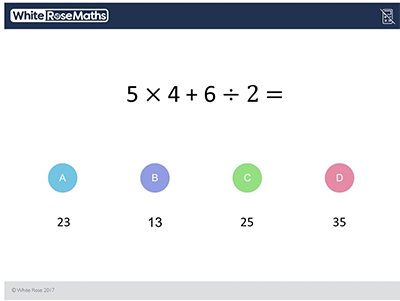 <br>
If a student selects the distractor "13," they may have the misconception "Carries out operations from left to right regardless of priority order."

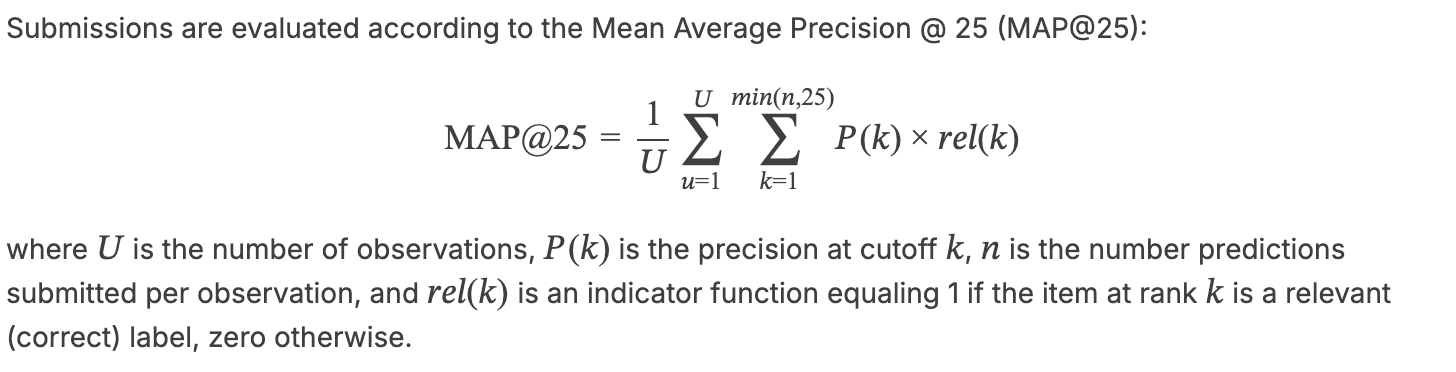

In [53]:
!kaggle competitions download -c eedi-mining-misconceptions-in-mathematics
!unzip eedi-mining-misconceptions-in-mathematics.zip -d eedi-mining-misconceptions-in-mathematics

  0%|                                                | 0.00/260k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 260k/260k [00:00<00:00, 130MB/s]
Archive:  eedi-mining-misconceptions-in-mathematics.zip
  inflating: eedi-mining-misconceptions-in-mathematics/misconception_mapping.csv  
  inflating: eedi-mining-misconceptions-in-mathematics/sample_submission.csv  
  inflating: eedi-mining-misconceptions-in-mathematics/test.csv  
  inflating: eedi-mining-misconceptions-in-mathematics/train.csv  


In [119]:
train = pd.read_csv('./eedi-mining-misconceptions-in-mathematics/train.csv')
misconceptions = pd.read_csv('./eedi-mining-misconceptions-in-mathematics/misconception_mapping.csv')
train.sample(10)

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
1495,1495,1274,Simplify algebraic expressions to maintain equ...,251,Simplifying Expressions by Collecting Like Terms,B,Tom and Katie are arguing about what term coul...,Only Tom,Only\nKatie,Both Tom and Katie,Neither is correct,1690.0,NaN,1690.0,NaN
212,212,1035,Represent a linear inequality in the form x ≤ ...,165,Inequalities on Number Lines,C,Which of the following diagrams represents \( ...,![Number line from -5 to 5. Open circle at -1 ...,![Number line from -5 to 5. Closed circle at -...,![Number line from -5 to 5. Open circle at -1 ...,![Number line from -5 to 5. Closed circle at -...,NaN,NaN,NaN,550.0
712,712,3175,For a given output find the input of a functio...,649,Function Machines,B,![A function machine with 3 rectangles in a ro...,\( 8 \frac{1}{4} \),\( 7 \frac{3}{4} \),\( 2 \),\( 32 \),2271.0,NaN,520.0,674.0
499,499,2861,Construct a pictogram involving fractions of s...,108,Pictogram,C,The pictogram shows the number of each type of...,\( 50 \),\( 5 \),\( 2.5 \),\( 10 \),1310.0,86.0,NaN,86.0
589,589,1795,Use facts about interior angles in polygons wi...,183,Angles in Polygons,A,What is the size of angle \( s \) ? ![4 angles...,\( 45^{\circ} \),\( 51.4^{\circ} \),\( 60^{\circ} \),Not enough information,NaN,528.0,NaN,NaN
857,857,1097,Write the next term of an ascending integer li...,171,Linear Sequences (nth term),B,What is the next term of this linear sequence?...,\( 22 \),\( 27 \),\( 24 \),\( 28 \),834.0,NaN,NaN,NaN
100,100,2869,Interpret a pie chart,109,Pie Chart,C,This pie chart shows the colour of hats that T...,\( \frac{1}{4} \),\( 75 \),\( \frac{3}{4} \),Impossible to say,463.0,1396.0,NaN,1326.0
680,680,1425,Factorise a single bracket containing a non-li...,52,Factorising into a Single Bracket,D,Jo and Paul are arguing about factorising.\n\n...,Only Jo,Only Paul,Both Jo and Paul,Neither is correct,838.0,NaN,NaN,NaN
1688,1688,3225,Write a missing term of an ascending integer l...,171,Linear Sequences (nth term),B,The \( 1^{\text {st }} \) term in a linear seq...,\( 82 \),\( 85 \),\( 74 \),\( 88 \),2386.0,NaN,NaN,2252.0
1289,1289,441,Multiply proper fractions in the form: Fractio...,231,Multiplying Fractions,D,\( \frac{6}{7} \times \frac{2}{3}=? \),\( 1 \frac{11}{21} \),\( \frac{9}{7} \),\( \frac{8}{21} \),\( \frac{4}{7} \),NaN,1.0,317.0,NaN


In [120]:
misconceptions.sample(10)

,MisconceptionId,MisconceptionName
595,595,Believes the adjacent side is where the opposi...
1107,1107,Converted hours to minutes instead of hours to...
2420,2420,Thinks direct proportion rules apply to invers...
2280,2280,Believes change in y for gradient is always ca...
1132,1132,Does not understand that a probability of 1 re...
104,104,Assumes a sequence is linear
317,317,"When multiplying fractions, adds the numerator..."
1032,1032,Confuses cube rooting with squaring a number
1245,1245,Believes a number written in standard form wit...
1535,1535,"Believes that when factorising a quadratic, th..."


In [121]:
misconceptions.MisconceptionId.nunique()

2587

In [122]:
print(f"""
Train size: {train.shape[0]}
Unique Subjects: {train.SubjectName.nunique()}
Unique Constructs: {train.ConstructName.nunique()}
Unique Questions: {train.QuestionText.nunique()}
""")


Train size: 1869
Unique Subjects: 163
Unique Constructs: 757
Unique Questions: 1857



In [123]:
train.filter(regex=r'Misconception').fillna(-100).astype(int).head()

,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
0,-100,-100,-100,1672
1,2142,143,2142,-100
2,1287,-100,1287,1073
3,1180,1180,-100,1180
4,-100,-100,-100,1818


In [124]:
from itertools import chain

# There are 2587 - 1605 = 982 not in train and potentially in kaggle test. 
# A lot of misconception with < 10 examples
# So simple classification maybe doesn't work
pd.Series(
    list(chain(*train.filter(regex=r'Misconception').fillna(-100).astype(int).values))
).value_counts()

-100     3106
 1214      54
 1379      43
 2316      38
 1507      36
         ... 
 962        1
 2371       1
 300        1
 965        1
 621        1
Name: count, Length: 1605, dtype: int64

<Axes: >

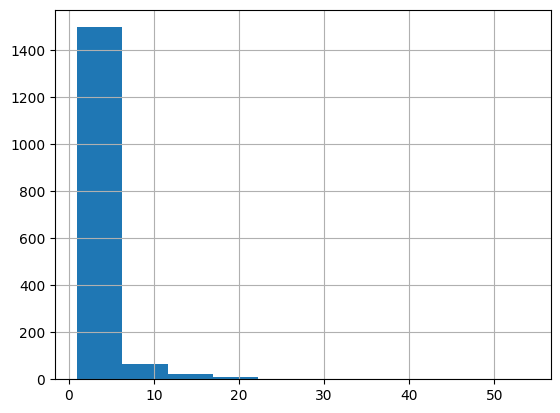

In [125]:
pd.Series(
    list(chain(*train.filter(regex=r'Misconception').fillna(-100).astype(int).values))
).value_counts()[1:].hist()

## Simple prediction with topK popular and different validation strategies

In [126]:
filtered_dataset = []

for ind, row in train.iterrows():
    correct = row['CorrectAnswer']
    for answ in ['A', 'B', 'C', 'D']:
        target = row[f'Misconception{answ}Id']
        if target > 0:
            target = int(target)
            neg_answer_column = f'Answer{answ}Text'
            filtered_dataset.append(
                    {
                        'QuestionId': row['QuestionId'],
                        'ConstructName': row['ConstructName'],
                        'SubjectName': row['SubjectName'],
                        'QuestionText': row['QuestionText'],
                        'CorrectAnswerText': row[f'Answer{correct}Text'],
                        'IncorrectAnswerText': row[f'Answer{answ}Text'],
                        'target': target
                    }
                )
print(f'Num query-answer pairs with target: {len(filtered_dataset)}')
filtered_dataset = pd.DataFrame(filtered_dataset)
filtered_dataset.head()

Num query-answer pairs with target: 4369


,QuestionId,ConstructName,SubjectName,QuestionText,CorrectAnswerText,IncorrectAnswerText,target
0,0,Use the order of operations to carry out calcu...,BIDMAS,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,\( 3 \times(2+4)-5 \),Does not need brackets,1672
1,1,Simplify an algebraic fraction by factorising ...,Simplifying Algebraic Fractions,"Simplify the following, if possible: \( \frac{...",Does not simplify,\( m+1 \),2142
2,1,Simplify an algebraic fraction by factorising ...,Simplifying Algebraic Fractions,"Simplify the following, if possible: \( \frac{...",Does not simplify,\( m+2 \),143
3,1,Simplify an algebraic fraction by factorising ...,Simplifying Algebraic Fractions,"Simplify the following, if possible: \( \frac{...",Does not simplify,\( m-1 \),2142
4,2,Calculate the range from a list of data,Range and Interquartile Range from a List of Data,Tom and Katie are discussing the \( 5 \) plant...,Only\nKatie,Only\nTom,1287


In [127]:
import numpy as np

# https://www.kaggle.com/code/nandeshwar/mean-average-precision-map-k-metric-explained-code

def apk(actual, predicted, k=25):
    if not actual:
        return 0.0

    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        # first condition checks whether it is valid prediction
        # second condition checks if prediction is not repeated
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    return score / min(len(actual), k)

def mapk(actual, predicted, k=25):
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

### Benchmarks


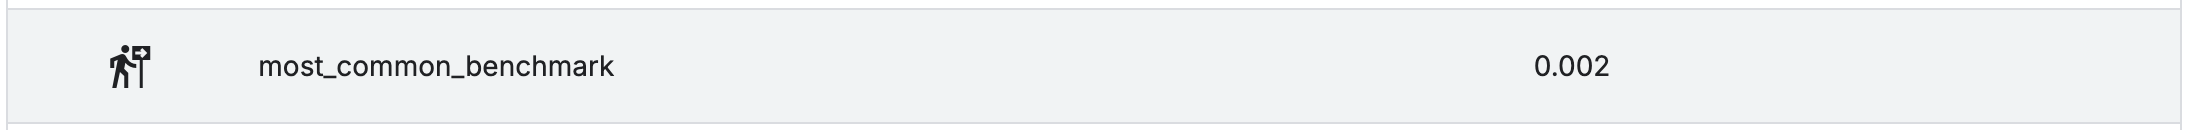
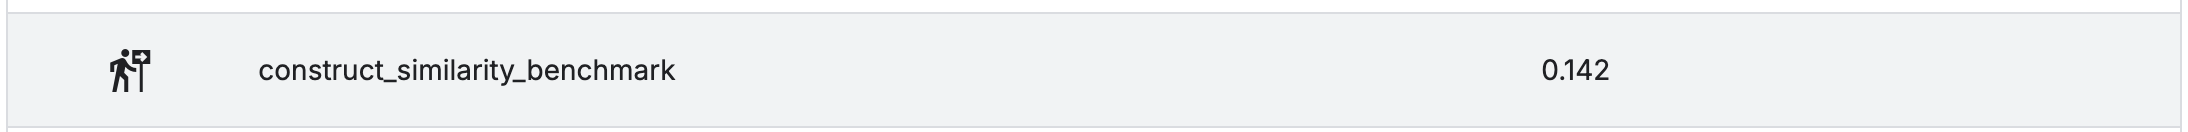 

### Let's try stratified split

(this is actually not so good here)

In [145]:
# Simple top N prediction

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = []
for train_index, valid_index in skf.split(filtered_dataset, y=filtered_dataset.target):
    train, valid = filtered_dataset.iloc[train_index], filtered_dataset.iloc[valid_index]
    naive_predict = list(train.target.value_counts()[:25].index)
    naive_predict_batch = [naive_predict for i in range(valid.shape[0])]
    gt_batch = [[t] for t in valid.target.tolist()]
    scores.append(mapk(gt_batch, naive_predict_batch))

print('All scores', scores)
print(f'Mean score: {round(np.mean(scores), 2)}; STD: {round(np.std(scores), 4)}')

All scores [0.03173160924635294, 0.031452797401540854, 0.03207677370260233, 0.03093333952427113, 0.02994834089392472]
Mean score: 0.03; STD: 0.0007


/home/abazdyrev/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [148]:
# Simple top N prediction within SubjectName

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = []
for train_index, valid_index in skf.split(filtered_dataset, y=filtered_dataset.target):
    train, valid = filtered_dataset.iloc[train_index], filtered_dataset.iloc[valid_index]

    naive_predict_constant = list(train.target.value_counts()[:25].index)
    naive_predict = train.groupby('SubjectName')['target'].apply(list).apply(
        lambda x: (list(pd.Series(x).value_counts()[:25].index) + naive_predict_constant)[:25]
    ).to_dict()

    preds = valid.SubjectName.apply(lambda x: naive_predict.get(x, naive_predict_constant))
    
    gt_batch = [[t] for t in valid.target.tolist()]
    scores.append(mapk(gt_batch, preds.tolist()))

print('All scores', scores)
print(f'Mean score: {round(np.mean(scores), 2)}; STD: {round(np.std(scores), 4)}')

/home/abazdyrev/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


All scores [0.2667284022879599, 0.2813613046548512, 0.2821394354520831, 0.2687989354257906, 0.2650418453645012]
Mean score: 0.27; STD: 0.0074


0.27 - too good to be true; 
It's obvious data leak in SKF even without submitting to kaggle (think about it)

In [153]:
# Simple top N prediction within SubjectName

from sklearn.model_selection import GroupKFold

gkf = GroupKFold(n_splits=5)

scores = []
for train_index, valid_index in gkf.split(filtered_dataset, groups=filtered_dataset.QuestionText):
    train, valid = filtered_dataset.iloc[train_index], filtered_dataset.iloc[valid_index]

    naive_predict_constant = list(train.target.value_counts()[:25].index)
    naive_predict = train.groupby('SubjectName')['target'].apply(list).apply(
        lambda x: (list(pd.Series(x).value_counts()[:25].index) + naive_predict_constant)[:25]
    ).to_dict()

    preds = valid.SubjectName.apply(lambda x: naive_predict.get(x, naive_predict_constant))
    
    gt_batch = [[t] for t in valid.target.tolist()]
    scores.append(mapk(gt_batch, preds.tolist()))

print('All scores', scores)
print(f'Mean score: {round(np.mean(scores), 2)}; STD: {round(np.std(scores), 4)}')

All scores [0.2392571229935548, 0.21936175200283206, 0.1977590825863486, 0.20840727615150811, 0.1965680169418295]
Mean score: 0.21; STD: 0.0158


Without submitting to kaggle this split looks valid, 
but with this kind of submission you won't get even close to 0.21 on the LB.

# Practical TODO:
- check different groupping; e.g. ConstructName, SubjectName
- try existing solutions https://www.kaggle.com/competitions/eedi-mining-misconceptions-in-mathematics/code
- try to train / finetune model, so there will be a correlation between local cv vs kaggle LB scores 